
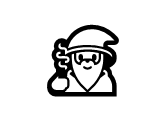
## Project 3: Reddit Classifier Project 

### Problem Statement

Harry Potter began as a series of seven fantasy novels by J. K. Rowling and later expanded into a multimedia franchise.
The multimedia franchise includes eight fantasy films, video games and themed attractions that have found commercial success worldwide.
Following the release of another spin-off book and new film franchise- Fantastic Beasts and Where to Find Them, the franchise as a whole has been rebranded as Wizarding World.

In this project, we attempt to find out if there are distinct fandoms for the different book series by classifying 2 subreddits r/harrypotter and r/FantasticBeasts based on their posts. If there is a distinct fandom for FantasticBeasts too, this shows there are business opportunities to grow revenue in developing merchandise, themed attractions etc... for FantasticBeasts fandom too!


### Executive Summary

In this project, `r/harrypotter` and `r/FantasticBeasts` posts are scrapped using Reddit API.The Reddit API will scrap 25 posts **per request**. To obtain sufficient data, a `for` loop is used in the Reddit API and `time.sleep()` function at the end of your loop to allow for a break in between requests. From the JSON format from reddit, the data are converted to Pandas DataFrame and then saved as a csv files to run in this Jupyter Notebook.


Now the reddit posts are organised as a structured data. Many information are obtained from this scrap like userid, timing of scrapping post, date of post, selftext (which are posts) and titles. Columns like 'title', 'selftext' and 'subreddit' are chosen from the dataframe. 'title' and 'selftext' contain the text data which will contain words in identifying the subreddit. 'subreddit' is the name of the `r/harrypotter` and `r/FantasticBeasts` thread and will be mapped to 1 and 0 respectively, this is our target array and what we are trying to accurately classify.


The 'title' and 'selftext' columns are 'combined'. If there are duplicated 'combined' posts and there are insufficient words in the 'combined' posts, these rows will dropped. Hyperlink is removed from the 'combined' posts and they are plotted on WordClouds - visual representations of words that give greater prominence to words that appear more frequently. This provides a visual signal of which words may help in classifying the different subreddit.
`r/harrypotter` and `r/FantasticBeasts` posts are then combined into 1 dataframe and split into random train and test subsets using train_test_split. Further data cleaning is done to convert into lowercase words, remove symbols and digits, generate the root form of the inflected words using stemming.


Pipelines consisting of either a CountVectorizer or TfidVectorizer(preprocessors that convert text data into numerical data) and a Classification algorithm are used. Each pipeline run through GridSearchCV to find the best parameters from the range of parameters chosen. The model with the best parameters is fit with train set and predicted with test set.


There are different metrics for establishing the best classification for this project. For this project, accuracy score of the train set, accuracy score of the test set, differences in the accuracy score between train & test set and the sensitivity are considered. Differences in the accuracy score between train & test set refer to how well the model can generalise to unseen data. There were many Classification Algoritms considered for example, Logistic Regression, KNN Classifier, Multinomial Naive Bayes Classification, Bagging Classifier, Random Forest Classifier and Extra Trees Classifier.


Based on the above considerations, **Random Forest Classifier and Countvectorizer** showed the highest sensitivity 88.6% and better ability to generalise to unseen data compared to other models, the delta between train and test accuracy score is 5.6%.
Hence, through the **Random Forest Classifier and Countvectorizer** model there is a sensitivity of 88.6% in classifying the `r/harrypotter` and `r/FantasticBeasts` subreddits. The fandom in `r/FantasticBeasts` are distinct from `r/harrypotter` and there are opportunities to market specific merchandise to this fandom and grow revenue.

### Contents
- [1. Standard Imports](#1.-Standard-Imports)
- [2. Importing CSV files](#2.-Importing-CSV-files)
- [3. Data Cleaning](#3.-Data-Cleaning)
- [4. Word Cloud](#4.-Word-Cloud)
 - [4.1 Harry Potter Word Cloud](#4.1-Harry-Potter-Word-Cloud)
 - [4.2 Fantastic Beasts Word Cloud](#4.2-Fantastic-Beasts-Word-Cloud)
 - [4.3 Word Cloud from both subreddits](#4.3-Word-Cloud-from-both-subreddits)
- [5. Train_test_split](#5.-Train_test_split)
- [6. Preprocessing subreddit text](#6.-Preprocessing-subreddit-text)
- [7. Baseline Accuracy](#7.-Baseline-Accuracy)
- [8. Logistic Regression](#8.-Logistic-Regression)
 -  [8.1 Logistic Regression and Countvectorizer pipeline](#8.1-Logistic-Regression-and-Countvectorizer-pipeline)
 -  [8.2 Logistic Regression and Tfidvectorizer pipeline](#8.2-Logistic-Regression-and-Tfidvectorizer-pipeline)
- [9. K-Nearest Neighbors](#9.-K-Nearest-Neighbors)
 -  [9.1 K-Nearest Neighbors and Countvectorizer pipeline](#9.1-K-Nearest-Neighbors-and-Countvectorizer-pipeline)
 -  [9.2 K-Nearest Neighbors and Tfidvectorizer pipeline](#9.2-K-Nearest-Neighbors-and-Tfidvectorizer-pipeline)
- [10. Multinomial Naive Bayes Classification](#10.-Multinomial-Naive-Bayes-Classification)
 -  [10.1 Multinomial Naive Bayes and Countvectorizer pipeline](#10.1-Multinomial-Naive-Bayes-and-Countvectorizer-pipeline)
 -  [10.2 Multinomial Naive Bayes and Tfidvectorizer pipeline](#10.2-Multinomial-Naive-Bayes-and-Tfidvectorizer-pipeline)
- [11. BaggingClassifier](#11.-Bagging-Classifier)
 -  [11.1 Bagging Classifier and Countvectorizer pipeline](#11.1-Bagging-Classifier-and-Countvectorizer-pipeline)
 -  [11.2 Bagging Classifier and Tfidvectorizer pipeline](#11.2-Bagging-Classifier-and-Tfidvectorizer-pipeline)
- [12. Random Forest Classifier](#12.-Random-Forest-Classifier)
 -  [12.1 Random Forest Classifier and Countvectorizer pipeline](#12.1-Random-Forest-Classifier-and-Countvectorizer-pipeline)
 -  [12.2 Random Forest Classifier and Tfidvectorizer pipeline](#12.2-Random-Forest-Classifier-and-Tfidvectorizer-pipeline)
- [13. Extra Trees Classifier](#13.-Extra-Trees-Classifier)
 -  [13.1 Extra Trees Classifier and Countvectorizer pipeline](#13.1-Extra-Trees-Classifier-and-Countvectorizer-pipeline)
 -  [13.2 Extra Trees Classifier and Tfidvectorizer pipeline](#13.2-Extra-Trees-Classifier-and-Tfidvectorizer-pipeline)
- [14. Scoreboard of different classification models](#14.-Scoreboard-of-different-classification-models)
- [15. Conclusion](#15.-Conclusion)
- [16. Recommendations & Further Improvements](#16.-Recommendations-&-Further-Improvements)



### 1. Standard Imports

In [1]:
# all the standard imports for python API
import requests
import pandas as pd
import time
import random

# standard imports for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# standard imports for regular expression and text cleaning
import regex as re
from bs4 import BeautifulSoup   
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# word cloud import
from wordcloud import WordCloud, STOPWORDS

# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
#from sklearn.preprocessing import StandardScaler

# Import pipline
from sklearn.pipeline import Pipeline

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import Classification ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Import Classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score

# Import GridsearchCV
from sklearn.model_selection import GridSearchCV

### 2. Importing CSV files

In [2]:
# read CSV files and keep blank columns default

harrypotterdf =pd.read_csv('harrypotterdf.csv', keep_default_na=False)
fantasticbeastsdf =pd.read_csv('fantasticbeastsdf.csv', keep_default_na=False)

In [3]:
#checking columns
harrypotterdf.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'is_video', 'post_hint', 'preview', 'url_overridden_by_dest',
       'is_gallery', 'media_metadata', 'gallery_data', 'crosspost_parent_list',
       'crosspost_parent', 'author_cakeday'],
      dtype='object', length=114)

In [4]:
# checking columns
fantasticbeastsdf.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'created_utc', 'num_crossposts', 'media', 'is_video',
       'crosspost_parent_list', 'crosspost_parent', 'media_metadata',
       'is_gallery', 'gallery_data', 'poll_data'],
      dtype='object', length=114)

In [5]:
#checking dataframe
harrypotterdf.head()

approved_at_utc    subreddit  \
0                  harrypotter   
1                  harrypotter   
2                  harrypotter   
3                  harrypotter   
4                  harrypotter   

                                            selftext author_fullname  saved  \
0  #HAPPY NEW YEAR, dear readers!\n\nIt is I, Mad...        t2_qirul  False   
1  Welcome, Hogwartsians, back to Rumbleroar’s NE...     t2_1wyg8nal  False   
2  When I was younger I would debate whether I re...     t2_a2hoz4mx  False   
3  Harry was absolutely fated to die and she pick...       t2_13k1le  False   
4  I’ve always wanted a Harry Potter book that wa...     t2_7hd906i7  False   

  mod_reason_title  gilded  clicked  \
0                        0    False   
1                        0    False   
2                        0    False   
3                        0    False   
4                        0    False   

                                               title  \
0  Happy New Year! Please enjoy the Winter 2021 Q...   
1  MROARch's RipROARing MegathROARd! New to /r/Ha...   
2  Why as an adult I find prof. Binns to be the m...   
3               Trelawny was right about everything.   
4                            I don’t need any action   

                    link_flair_richtext  ... is_video  post_hint  \
0  [{'e': 'text', 't': 'Announcement'}]  ...    False              
1  [{'e': 'text', 't': 'Announcement'}]  ...    False       self   
2      [{'e': 'text', 't': 'Question'}]  ...    False              
3    [{'e': 'text', 't': 'Discussion'}]  ...    False              
4    [{'e': 'text', 't': 'Discussion'}]  ...    False              

                                             preview url_overridden_by_dest  \
0                                                                             
1  {'images': [{'source': {'url': 'https://extern...                          
2                                                                             
3                                                                             
4                                                                             

   is_gallery media_metadata gallery_data  crosspost_parent_list  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  crosspost_parent  author_cakeday  
0                                   
1                                   
2                                   
3                                   
4                                   

[5 rows x 114 columns]

In [6]:
# checking dataframe
fantasticbeastsdf.head()

approved_at_utc        subreddit  \
0                  FantasticBeasts   
1                  FantasticBeasts   
2                  FantasticBeasts   
3                  FantasticBeasts   
4                  FantasticBeasts   

                                            selftext author_fullname  saved  \
0                                                         t2_c8hxx6z  False   
1                                                        t2_613fki0z  False   
2                                                        t2_9qcvr9v8  False   
3                                                         t2_ixcfsqp  False   
4  Do you seen these rumours last week about John...     t2_7jgojbrg  False   

  mod_reason_title  gilded  clicked  \
0                        0    False   
1                        0    False   
2                        0    False   
3                        0    False   
4                        0    False   

                                               title link_flair_richtext  ...  \
0  Mads Mikkelsen Will Play Gellert Grindelwald i...                  []  ...   
1  Fantastic Beast 3's Katherine Waterston Talks ...                  []  ...   
2                                    Queenie Reading                  []  ...   
3  The history of Illvermorny is the key (theory ...                  []  ...   
4       Fantastic Beasts cancelled after third film?                  []  ...   

    created_utc  num_crossposts  media is_video  \
0  1.606342e+09               0           False   
1  1.615367e+09               0           False   
2  1.615272e+09               0           False   
3  1.615242e+09               0           False   
4  1.615306e+09               0           False   

                               crosspost_parent_list crosspost_parent  \
0                                                                       
1                                                                       
2  [{'approved_at_utc': None, 'subreddit': 'Wizar...        t3_m10qnf   
3                                                                       
4                                                                       

  media_metadata  is_gallery gallery_data  poll_data  
0                                                     
1                                                     
2                                                     
3                                                     
4                                                     

[5 rows x 114 columns]

### 3. Data Cleaning

In [7]:
# naming the interested columns into protagonist of book series
harry = harrypotterdf[['subreddit', 'selftext', 'title']]
harry.head()

subreddit                                           selftext  \
0  harrypotter  #HAPPY NEW YEAR, dear readers!\n\nIt is I, Mad...   
1  harrypotter  Welcome, Hogwartsians, back to Rumbleroar’s NE...   
2  harrypotter  When I was younger I would debate whether I re...   
3  harrypotter  Harry was absolutely fated to die and she pick...   
4  harrypotter  I’ve always wanted a Harry Potter book that wa...   

                                               title  
0  Happy New Year! Please enjoy the Winter 2021 Q...  
1  MROARch's RipROARing MegathROARd! New to /r/Ha...  
2  Why as an adult I find prof. Binns to be the m...  
3               Trelawny was right about everything.  
4                            I don’t need any action

In [8]:
# naming the interested columns into protagonist of book series
newt = fantasticbeastsdf[['subreddit', 'selftext', 'title']]
newt.head()

subreddit                                           selftext  \
0  FantasticBeasts                                                      
1  FantasticBeasts                                                      
2  FantasticBeasts                                                      
3  FantasticBeasts                                                      
4  FantasticBeasts  Do you seen these rumours last week about John...   

                                               title  
0  Mads Mikkelsen Will Play Gellert Grindelwald i...  
1  Fantastic Beast 3's Katherine Waterston Talks ...  
2                                    Queenie Reading  
3  The history of Illvermorny is the key (theory ...  
4       Fantastic Beasts cancelled after third film?

In [9]:
# checking for null values, for empty entries they will remain empty as keep_default_na = False
harry.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [10]:
# checking for null values, for empty entries they will remain empty as keep_default_na = False
newt.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [11]:
# create copy due to SettingwithCopyWarning
newt=newt.copy()
harry=harry.copy()

# combining the text from selftext and title together as they are relevant
# there could be missing 'selftext' but relevant 'titles'
harry['combine'] = harry['selftext'] + harry['title']
newt['combine'] = newt['selftext'] + newt['title']

# removing duplicate posts
harry.drop_duplicates(subset=['combine'],inplace=True)
newt.drop_duplicates(subset=['combine'],inplace=True)

In [12]:
# checking posts/titles that are very short & may not be able to inform much regarding the topic

harry['length of post'] = [len(sentence.split()) for sentence in harry['combine']]
newt['length of post'] = [len(sentence.split()) for sentence in newt['combine']]

In [13]:
# length of post <= 5 have few words and may not help in classification

harry[harry['length of post']<=5]

subreddit selftext                             title  \
15   harrypotter           Happy birthday Sybill Trelawney!   
172  harrypotter                    THIS IS SENDING ME LMAO   
176  harrypotter                              Imma head out   
177  harrypotter                       Weasley is MY king!☺   
181  harrypotter                                     Haahaa   
..           ...      ...                               ...   
973  harrypotter                             How about you?   
975  harrypotter                                 beedleborb   
976  harrypotter                                   obsessed   
977  harrypotter                             1 Step Closer!   
979  harrypotter                         If only Harry knew   

                              combine  length of post  
15   Happy birthday Sybill Trelawney!               4  
172           THIS IS SENDING ME LMAO               5  
176                     Imma head out               3  
177              Weasley is MY king!☺               4  
181                            Haahaa               1  
..                                ...             ...  
973                    How about you?               3  
975                        beedleborb               1  
976                          obsessed               1  
977                    1 Step Closer!               3  
979                If only Harry knew               4  

[144 rows x 5 columns]

In [14]:
# length of post <= 5 have few words and may not help in classification

newt[newt['length of post']<=5]

subreddit selftext                                    title  \
2    FantasticBeasts                                   Queenie Reading   
5    FantasticBeasts                                   I am not sorry.   
19   FantasticBeasts                             Happy Birthday Newt 🎂   
23   FantasticBeasts                           Happy Birthday Newt!!!!   
30   FantasticBeasts                        Grindelwald &gt; Voldemort   
..               ...      ...                                      ...   
920  FantasticBeasts                                        OH COME ON   
923  FantasticBeasts           Is Grindelwals stronger than Voldemord?   
928  FantasticBeasts                      The only tweet that matters.   
934  FantasticBeasts                                      I drew Newt!   
954  FantasticBeasts                                        Bowtruckle   

                                     combine  length of post  
2                            Queenie Reading               2  
5                            I am not sorry.               4  
19                     Happy Birthday Newt 🎂               4  
23                   Happy Birthday Newt!!!!               3  
30                Grindelwald &gt; Voldemort               3  
..                                       ...             ...  
920                               OH COME ON               3  
923  Is Grindelwals stronger than Voldemord?               5  
928             The only tweet that matters.               5  
934                             I drew Newt!               3  
954                               Bowtruckle               1  

[90 rows x 5 columns]

In [15]:
print('number of rows with less than 5 words in harry dataframe :' , len(harry[harry['length of post']<=5]))
print('number of rows with less than 5 words in newt dataframe :' , len(newt[newt['length of post']<=5]))

number of rows with less than 5 words in harry dataframe : 144
number of rows with less than 5 words in newt dataframe : 90


In [16]:
# decide to drop rows that have 5 or less words

harry.drop(harry[harry['length of post']<=5].index, inplace=True)
newt.drop(newt[newt['length of post']<=5].index, inplace=True)

In [17]:
# keep 'combine' column for cleaning and preprocessing
# keep 'subreddit' that will be target array 

harry.drop(['selftext', 'title', 'length of post'], axis=1, inplace=True)
newt.drop(['selftext', 'title', 'length of post'], axis=1, inplace=True)

In [18]:
# check if remainining rows are significant

print('harry dataframe shape:' , harry.shape)
print('newt dataframe shape:' , newt.shape)

harry dataframe shape: (839, 2)
newt dataframe shape: (880, 2)


In [19]:
# use regex to remove https
def remove_https(sentence):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',sentence)

# apply to both dataframs
harry['combine'] = harry['combine'].map(remove_https)
newt['combine'] = newt['combine'].map(remove_https)

In [20]:
# combine both dataframes together

df = pd.concat([harry, newt])

In [115]:
# save for future reference
df.to_csv('df.csv', index=False)

In [21]:
#checking shape and len of df

df.shape

(1719, 2)

In [22]:
# 'subreddit' will be target array and unique value mapped into 0 and 1 respectively

df['subreddit'].value_counts()

FantasticBeasts    880
harrypotter        839
Name: subreddit, dtype: int64

In [23]:
# mapping

df['subreddit'] = df['subreddit'].map({'FantasticBeasts': 0, 'harrypotter': 1})
df.head()

subreddit                                            combine
0          1  #HAPPY NEW YEAR, dear readers!\n\nIt is I, Mad...
1          1  Welcome, Hogwartsians, back to Rumbleroar’s NE...
2          1  When I was younger I would debate whether I re...
3          1  Harry was absolutely fated to die and she pick...
4          1  I’ve always wanted a Harry Potter book that wa...

### 4. Word Cloud

In [25]:
from wordcloud import WordCloud, STOPWORDS

In [122]:
#new_stopwords = stopwords.words('english') + ['harry', 'potter', 'harrypotter', 'hp','fantastic', 'beasts', 'fantasticbeasts', 'newt', 'scamander', 'newtscamander', 'harri'

In [67]:
def words_for_wordcloud(data):
    text = BeautifulSoup(data).get_text().lower()
    text2 = re.sub("[^a-zA-Z]", " ", text).split()
    text4 = [ w for w in text2 if w not in stopwords.words('english')]
    return (" ".join(text4))

#### 4.1 Harry Potter Word Cloud

In [68]:
harry_cloud= ''

for row in harry['combine']:
    harry_cloud += (words_for_wordcloud(row))
    
# the new string of text assigned as harry_cloud

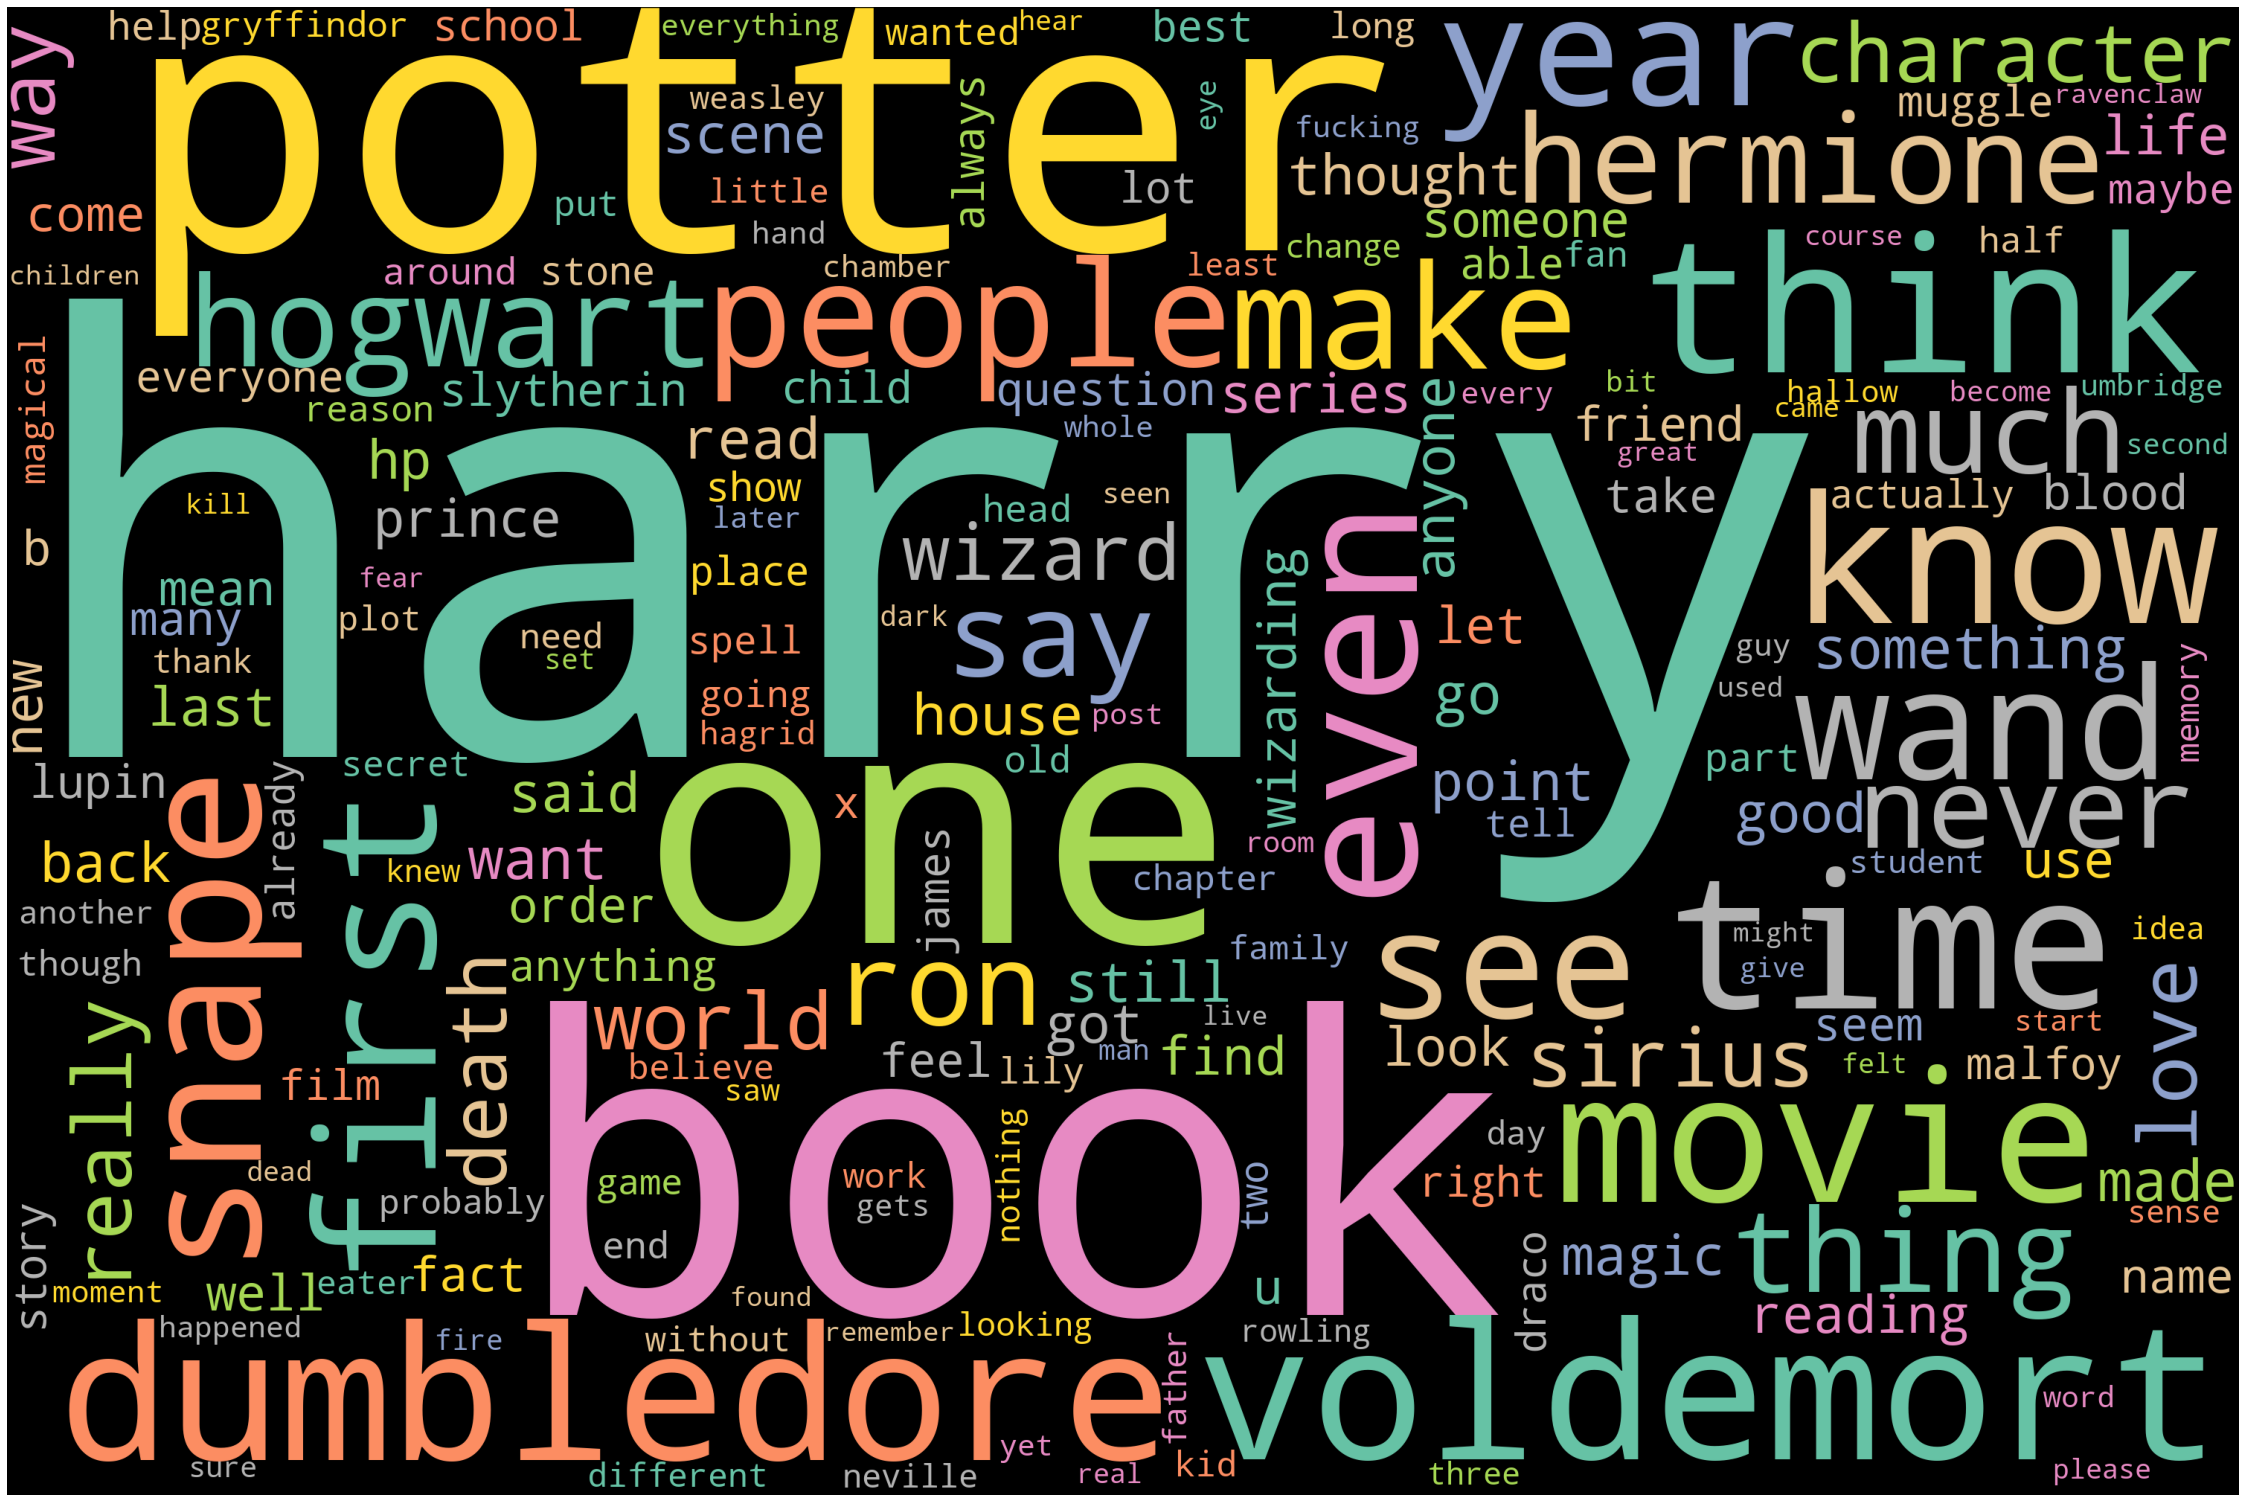

In [125]:
#plot word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(harry_cloud)

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
plot_cloud(wordcloud)

In [69]:
# create a dictionary to count words in harrypotter subreddit posts

harry_dict = dict()
for word in harry_cloud.split():
    if word not in harry_dict:
        harry_dict[word] = 1
    else:
        harry_dict[word] += 1

Text(0.5, 1.0, 'Words with highest frequency in Harry Potter subreddit')

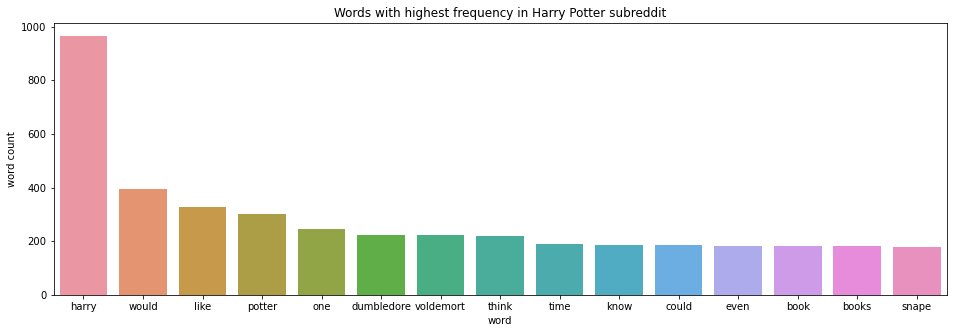

In [79]:
# convert dictionary into dataframe
harry_top_words = pd.DataFrame(list(harry_dict.items()), columns=['word','word count'])
harry_15_words = harry_top_words.sort_values(by='word count', ascending=False).head(15)

# plot the top 15 most frequent words in harrypotter subreddit posts
plt.figure(figsize=(16,5))
sns.barplot(x=harry_15_words['word'], y=harry_15_words['word count'], data=harry_15_words)
plt.title('Words with highest frequency in Harry Potter subreddit');

In [ ]:
From the above 

#### 4.2 Fantastic Beasts Word Cloud

In [75]:
newt_cloud= ''

for row in newt['combine']:
    newt_cloud += (words_for_wordcloud(row))
    
# the new string of text assigned as newt_cloud

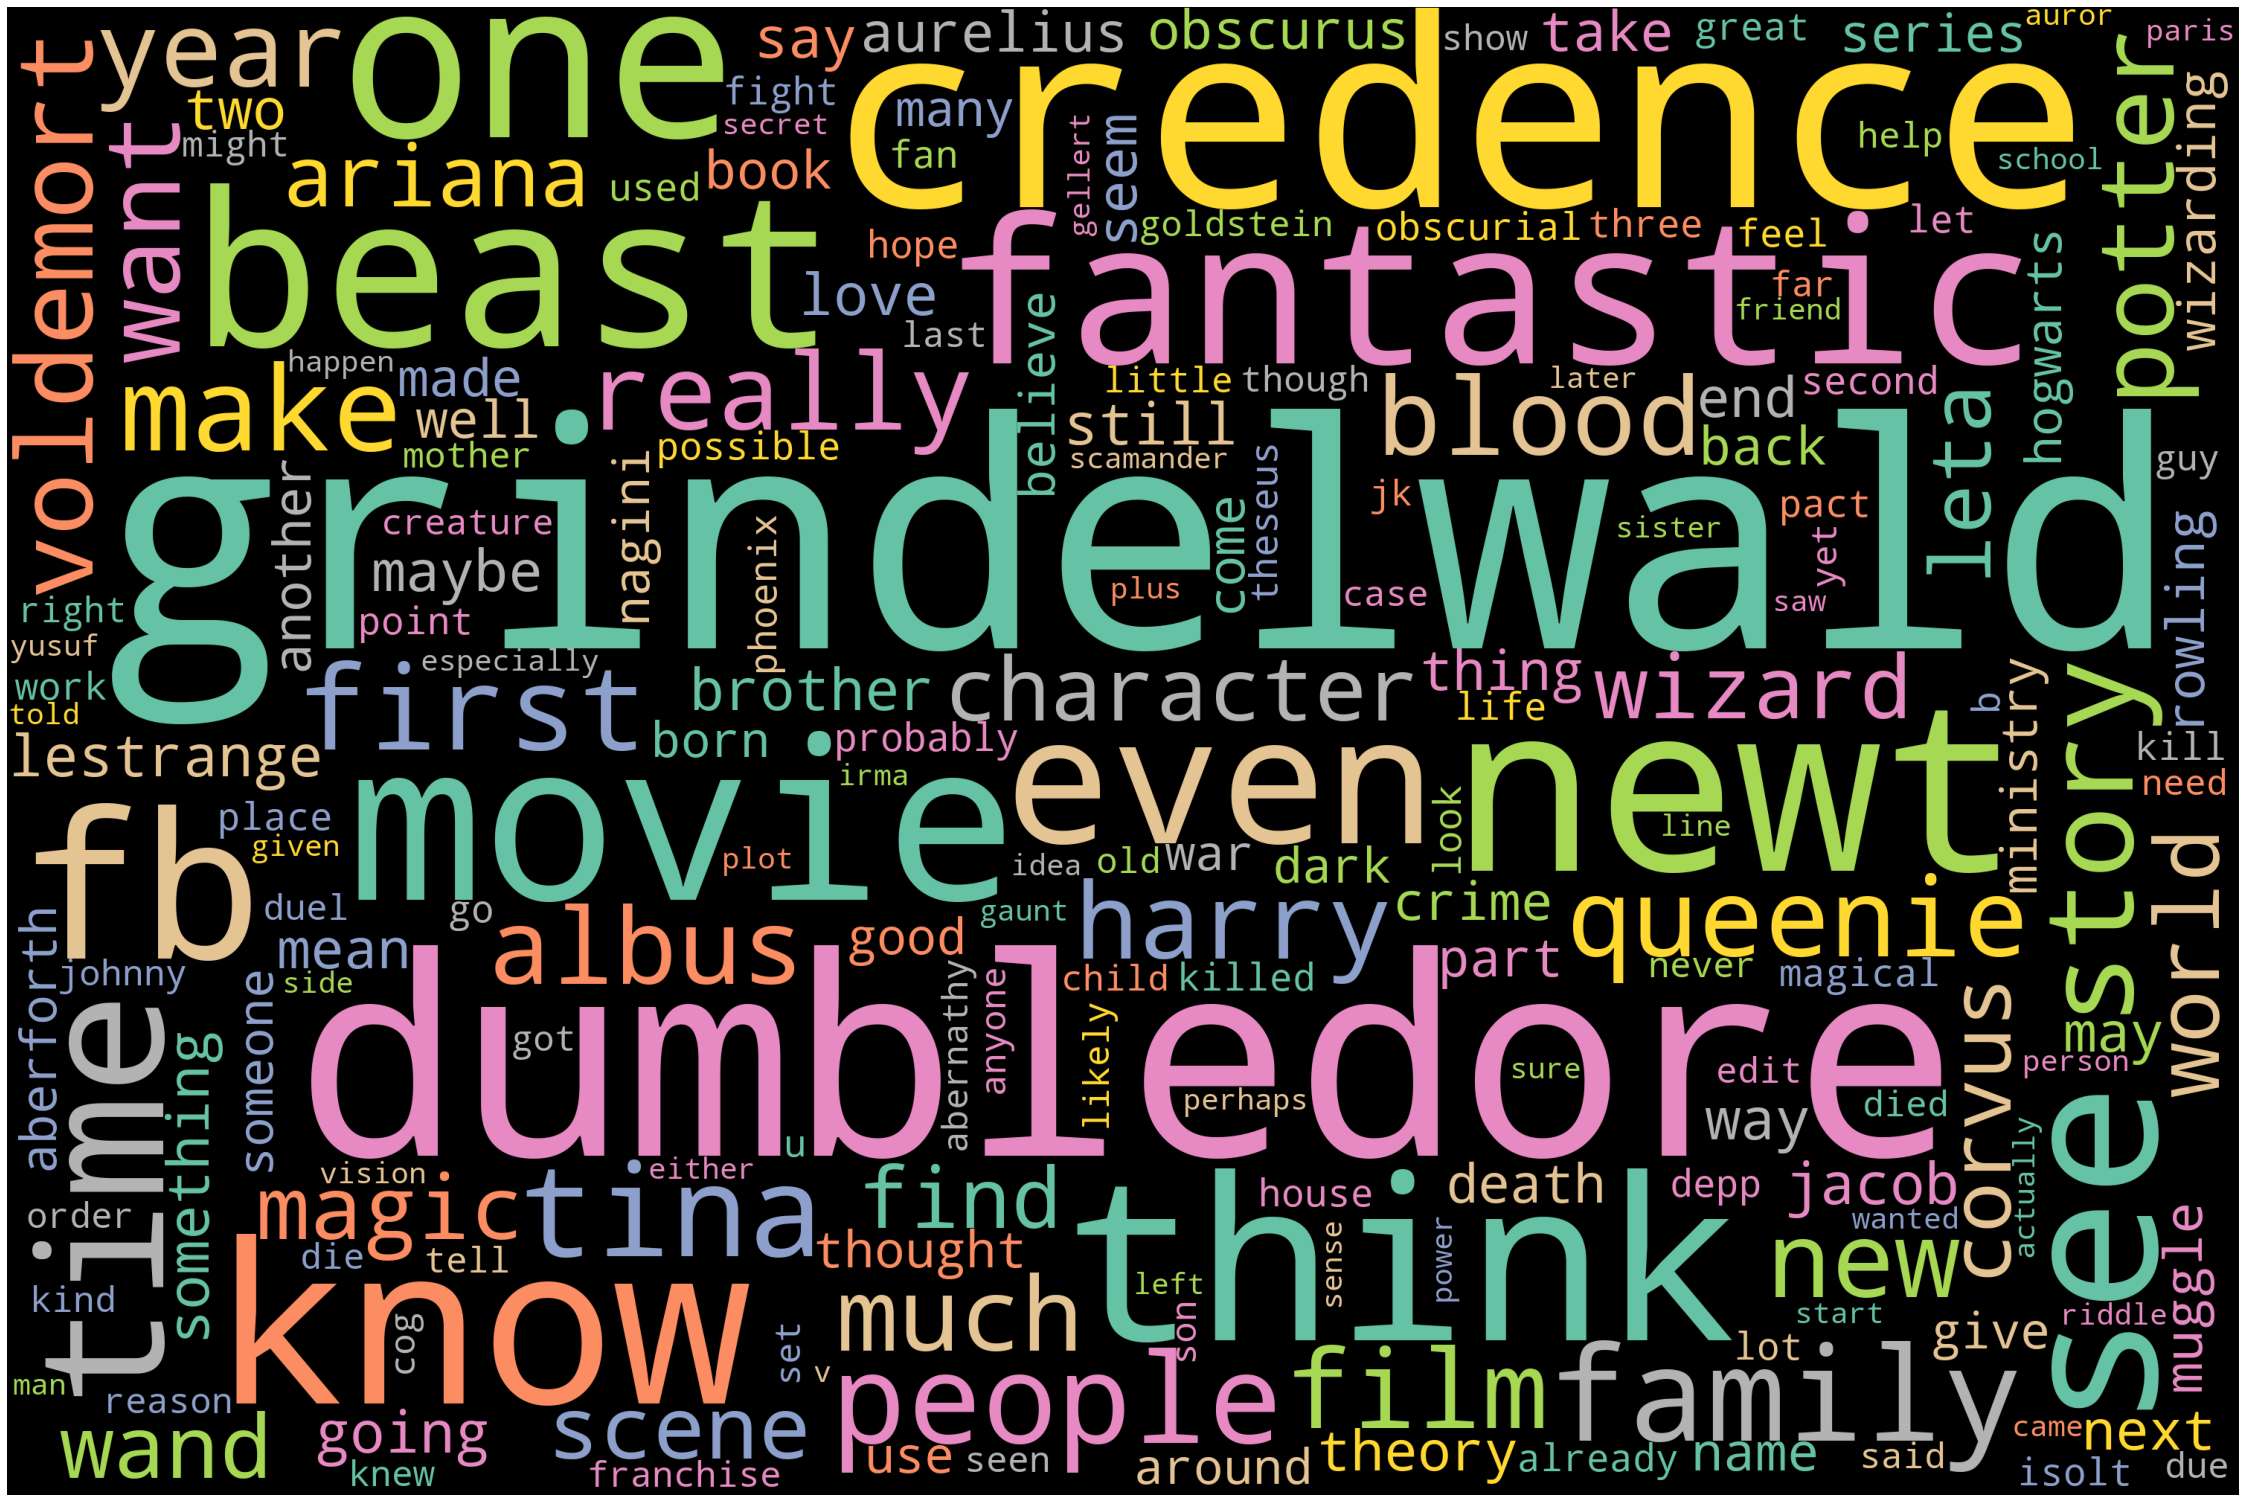

In [132]:
#plot the word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(newt_cloud)
    
plot_cloud(wordcloud)

In [76]:
# create a dictionary to count words in FantasticBeasts subreddit posts

newt_dict = dict()
for word in newt_cloud.split():
    if word not in newt_dict:
        newt_dict[word] = 1
    else:
        newt_dict[word] += 1

Text(0.5, 1.0, 'Words with highest frequency in Fantastic Beasts subreddit')

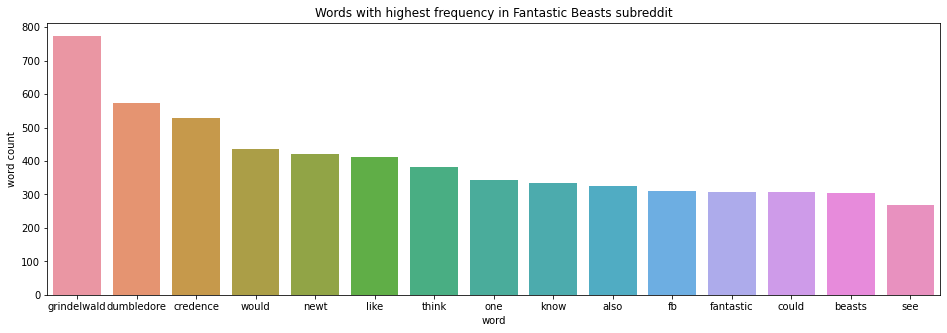

In [78]:
# convert dictionary into dataframe
newt_top_words = pd.DataFrame(list(newt_dict.items()), columns=['word','word count'])
newt_15_words = newt_top_words.sort_values(by='word count', ascending=False).head(15)

# plot the top 15 most frequent words in harrypotter subreddit posts
plt.figure(figsize=(16,5))
sns.barplot(x=newt_15_words['word'], y=newt_15_words['word count'], data=newt_15_words)
plt.title('Words with highest frequency in Fantastic Beasts subreddit');

#### 4.3 Word Cloud from both subreddits

In [80]:
df_cloud= ''

for row in df['combine']:
    df_cloud += (words_for_wordcloud(row))
    
# the new string of text assigned as df_cloud

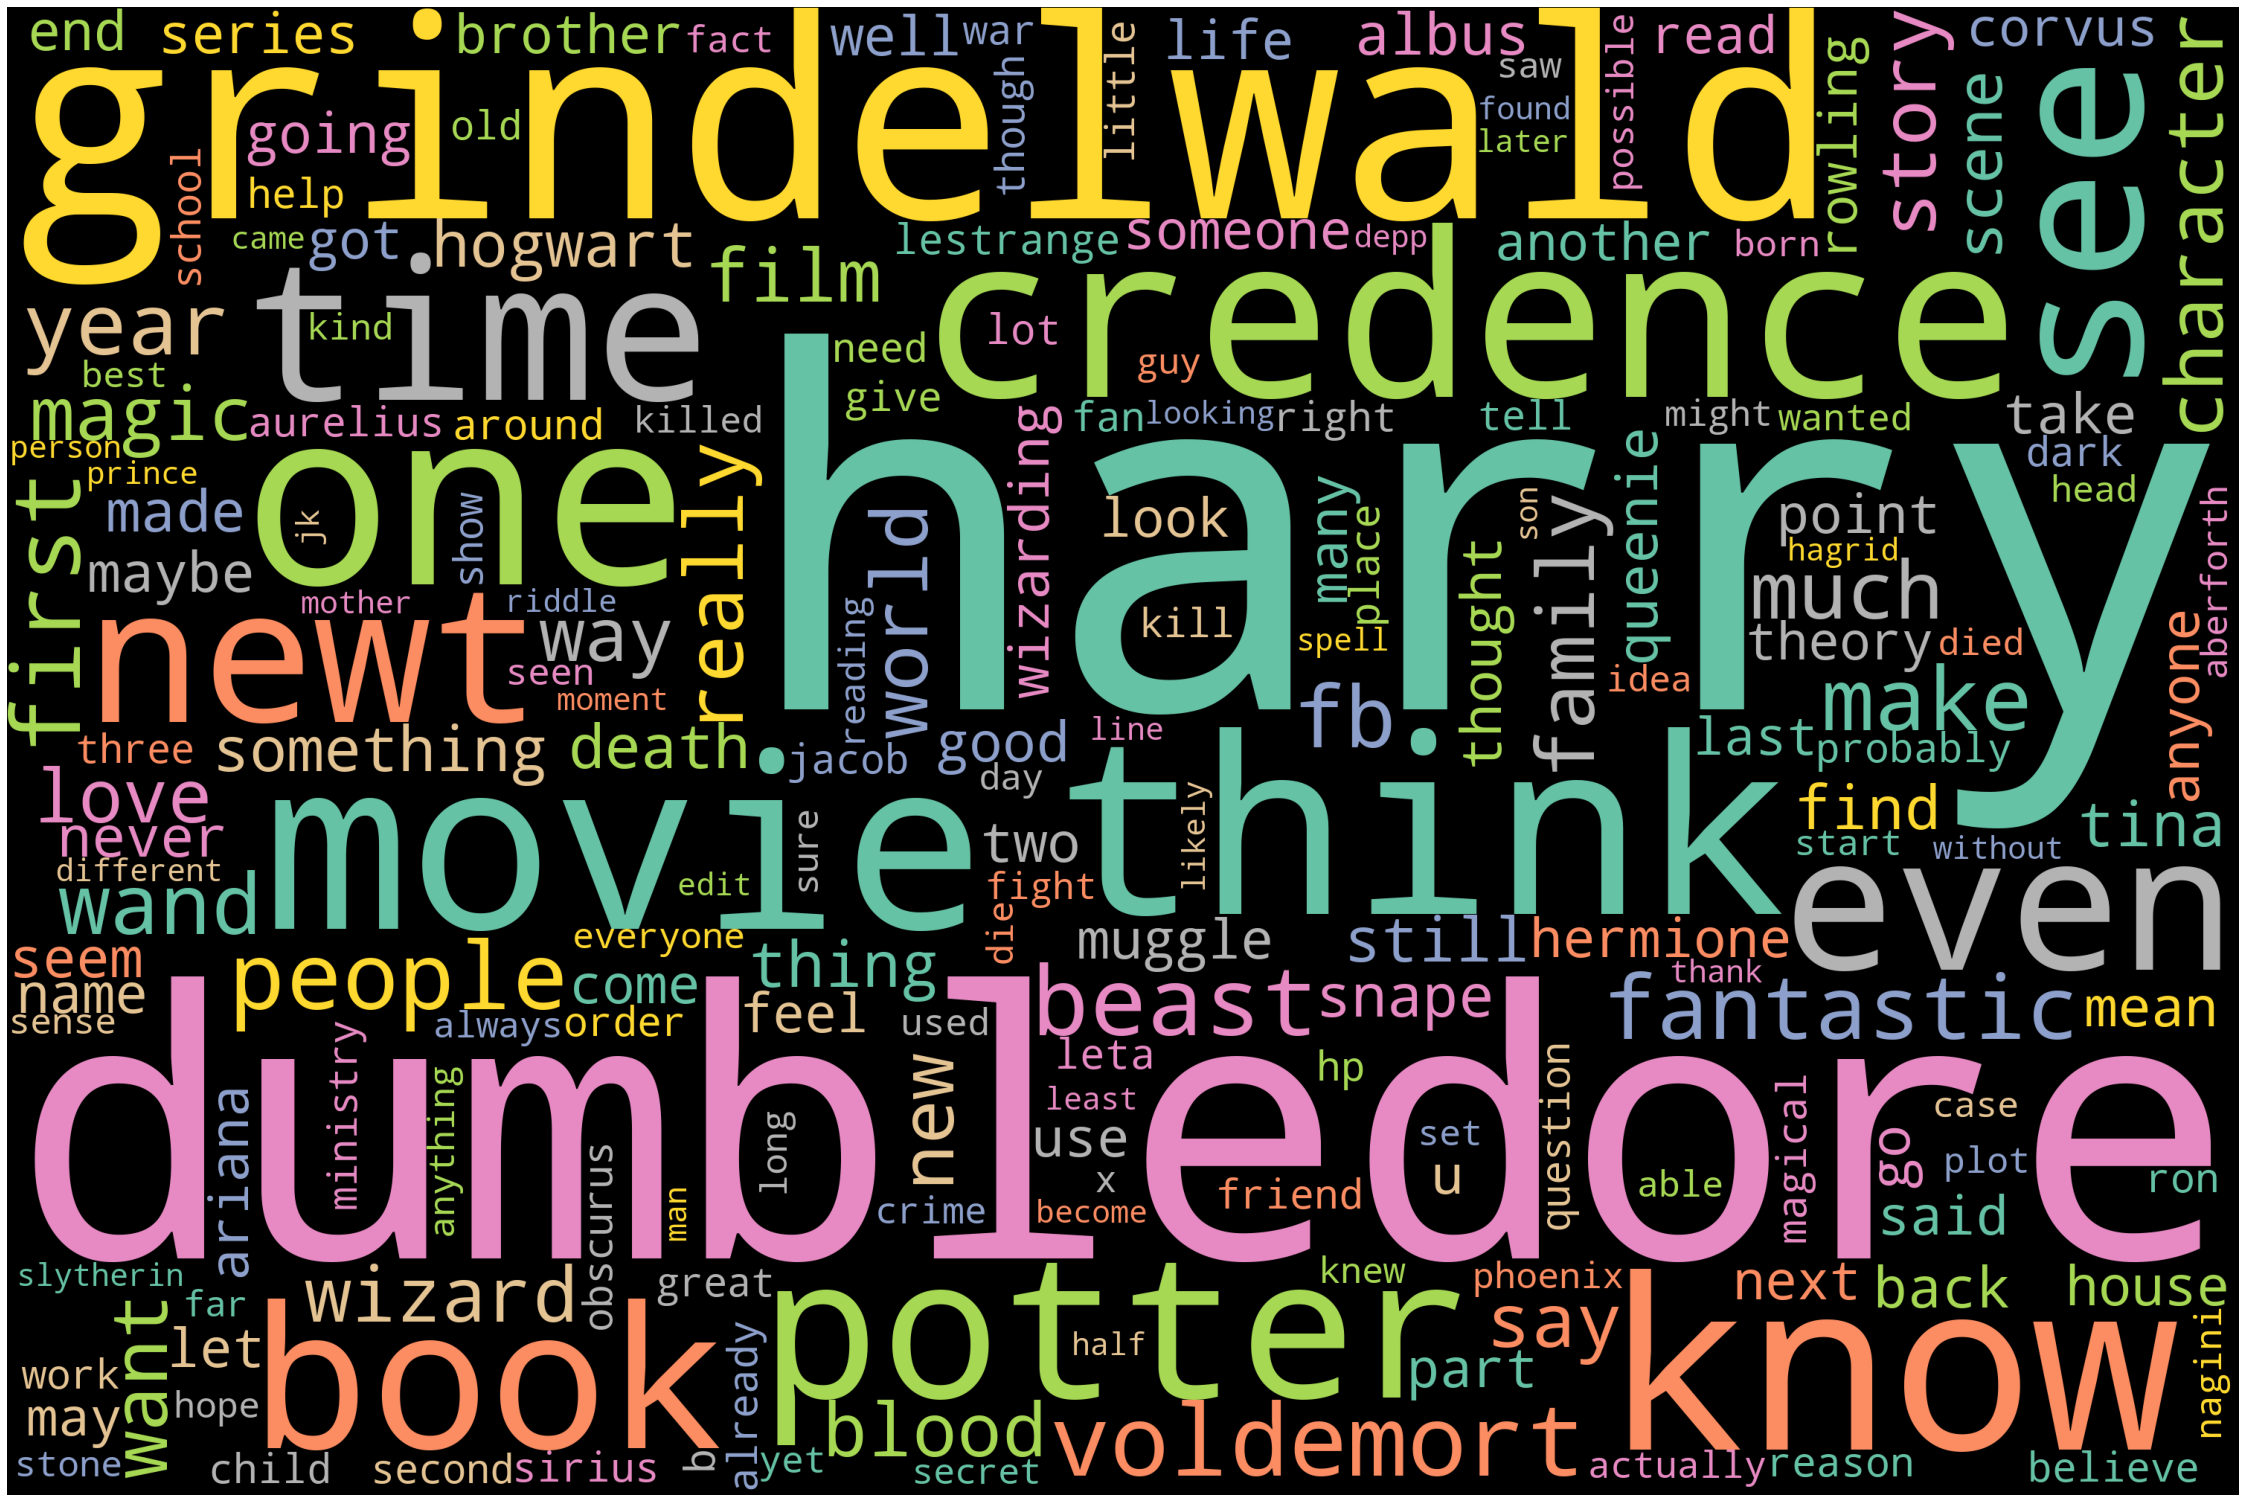

In [34]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(df_cloud)
    
plot_cloud(wordcloud)

In [81]:
# compile the word and word counts into a dictionary
df_dict = dict()
for word in df_cloud.split():
    if word not in df_dict:
        df_dict[word] = 1
    else:
        df_dict[word] += 1

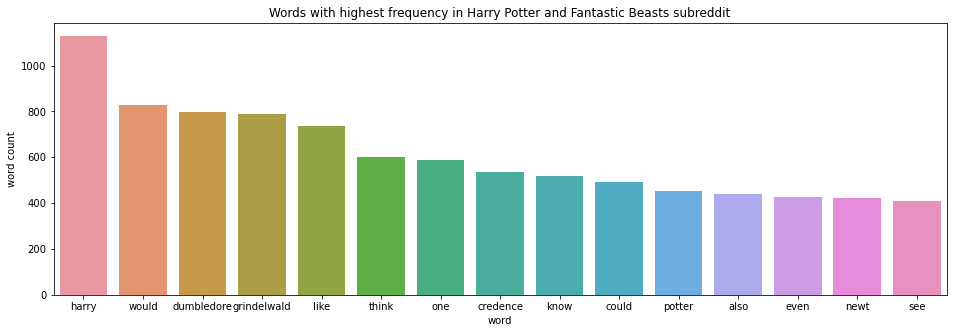

In [82]:
# convert dictionary into dataframe
df_top_words = pd.DataFrame(list(df_dict.items()), columns=['word','word count'])
df_15_words = df_top_words.sort_values(by='word count', ascending=False).head(15)

# plot the top 15 most frequent words in both subreddit posts
plt.figure(figsize=(16,5))
sns.barplot(x=df_15_words['word'], y=df_15_words['word count'], data=df_15_words)
plt.title('Words with highest frequency in Harry Potter and Fantastic Beasts subreddit');

### 5. Train_test_split

In [24]:
# Create train_test_split
# df[['combine']] is the feature matrix, X which have to be the DataFrame
# df['subreddit'] is the target array, y

X_train, X_test, y_train, y_test = train_test_split(df[['combine']],
                                                    df['subreddit'],
                                                    stratify=df['subreddit'],
                                                    random_state=42)

In [83]:
# checking shape of train and test set

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (1289, 1)
X_test.shape :  (430, 1)
y_train.shape :  (1289,)
y_test.shape :  (430,)


In [85]:
# checking if the X_train columns matches the X_test columns
X_train.columns == X_test.columns

array([ True])

### 6. Preprocessing subreddit text

In [26]:
# added additional stopwords like the protagonist of each books series
# as Fantastic Beasts is an on-going movie franchise, words like movi, trailer, fb are added

new_stopwords = stopwords.words('english') + ['harry', 'potter', 'harrypotter', 'hp','fantastic', 'beasts', 
                                              'fantasticbeasts', 'newt', 'scamander', 'newtscamander', 'harri', 
                                              'book','books','film', 'fantast' ,'beast', 'trailer','movi','movie','franchis', 
                                              'fb','grindelwald','credenc']

#### Additional stopwords are included:
 1. **names of the subreddit**: harrypotter in r/harrypotter and FantasticBeasts in r/FantasticBeasts
 2. **names of the protagonist from each book series**: Harry Potter, Newt Scamander and other permutation of the character name
 3. **words referring to movie franchises**: these words appear more frequently in the FantasticBeasts subreddit as it is a on-going movie franchise and many posts are discussing the movie plot and franchise
 4. **pivotal characters that are only found in 1 book series**: 'grindelwald' and 'credenc' are characters exclusive to r/FantasticBeasts and as movie is fairly recent, many posts were discussing these 2 characters
        

In [27]:
# initialize PorterStemmer() to use in below function
# text: to extract text and lowercase all of the words
# text2: use regex to remove digits and symbols and split into words
# text3: stem words
# text4: remove additional stop words
p_stemmer = PorterStemmer()

def redditpost_to_words(data):
    text = BeautifulSoup(data).get_text().lower()
    text2 = re.sub("[^a-zA-Z]", " ", text).split()
    text3 = [p_stemmer.stem(i) for i in text2]
    text4 = [ w for w in text3 if w not in new_stopwords]
    return (" ".join(text4))

In [28]:
X_train_clean=list()

for row in X_train['combine']:
    X_train_clean.append(redditpost_to_words(row))
    
# 'cleaned' into a new list X_train_clean

In [29]:
X_test_clean=list()

for row in X_test['combine']:
    X_test_clean.append(redditpost_to_words(row))
    
# 'cleaned' into a new list X_test_clean

Data cleaning is done to clean up the list of subreddit post to a list of words:
   1. to extract text and lowercase all of the words
   2. use regex to remove digits and symbols and split into words
   3. stem words using PorterStemmer
   4. remove stop words + stop words created in consideration of r/harrypotter & r/FantasticBeasts posts

The final list in the train set will be the 'vocab' for reference after preoprocessing through TfidVectorizer or CountVectorizer to convert words into numerical values.

### 7. Baseline Accuracy

In [45]:
df['subreddit'].value_counts(normalize=True)

0    0.511926
1    0.488074
Name: subreddit, dtype: float64

Baseline accuracy is 51% where 1 refers to r/harrypotter while 0 refers to r/FantasticBeasts

### 8. Logistic Regression

#### 8.1 Logistic Regression and Countvectorizer pipeline

In [88]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver='lbfgs')),
])

# create a Pipeline and assign name to transformer CountVectorizer() & estimator LogisticRegression()
# purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters

In [89]:
# used .get_params() to know what hyperparameters can be tuned for best cross validation score
# will iterate through the list of hyperpatameters and 5 times cross-validation
# assign the different params to the name in the pipe

pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'lr__C': [0.01, 0.1, 1.0],
}

# 5 time cross-validation using the hyperparameters in the pipe_params
logreg_count = GridSearchCV(pipe, pipe_params, cv=5) 

# fit GridSearch to training data
logreg_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': [0.01, 0.1, 1.0]})

In [57]:
# create a function to calculate different accuracy score for comparison between models
# append the difference accuracy score for gridsearch, train set, test set to separate lists

GridSearch_CV_accuracy_score = list()
model_training_accuracy_score = list()
model_testing_accuracy_score = list()

def list_of_scores(gridsearch_name):
    # GridSearch Accuracy Score
    GridSearch_CV_accuracy_score.append(gridsearch_name.best_score_)
    print(f'GridSearchCV accuracy score  : {gridsearch_name.best_score_}')
    
    # assign best hyperparams from GridSearchCV into model
    final_model = gridsearch_name.best_estimator_
    
    # train set accuracy score
    training_accuracy_score = final_model.score(X_train_clean, y_train)
    model_training_accuracy_score.append(training_accuracy_score)
    print(f'train set accuracy score  : {training_accuracy_score}')
    
    # test set accuracy score
    testing_accuracy_score = final_model.score(X_test_clean, y_test)
    model_testing_accuracy_score.append(testing_accuracy_score)
    print(f'test set accuracy score  : {testing_accuracy_score}')

In [58]:
print('For Logistic Regression and Countvectorizer pipeline :')
print()
list_of_scores(logreg_count)

For Logistic Regression and Countvectorizer pipeline :

GridSearchCV accuracy score  : 0.7975266190088378
train set accuracy score  : 0.9534522885958107
test set accuracy score  : 0.813953488372093


In [59]:
# create function to plot confusion matrix and ROC AUC curve
# append the difference accuracy score for sensitvity, fall_out rate to separate lists

accuracy_score_ytest_pred = list()
sensitivity = list()
fall_out = list()

def accuracy_and_confusionmatrix(gridsearch_name):
    
    # assign best hyperparams from GridSearchCV into model
    final_model = gridsearch_name.best_estimator_
    
    # accuracy score of y_test vs predictions
    predictions = final_model.predict(X_test_clean)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy score using y_test and predictions  : {accuracy}')
    print()
    accuracy_score_ytest_pred.append(accuracy)
    
    # plot_confusion_matrix
    plot_confusion_matrix(final_model, X_test_clean, y_test, cmap='Blues', values_format='d')
    
    # unravel confusion_matrix and find out tn, fp, fn, tp
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print("True Negatives  : %s" % tn)
    print("False Positives  : %s" % fp)
    print("False Negatives  : %s" % fn)
    print("True Positives  : %s" % tp)
    print()
    
    # plot_roc_curve(logreg_count_model, X_test_clean, y_test)
    plot_roc_curve(final_model, X_test_clean, y_test)
    
    # sensitivity
    sensi = tp/(tp + fn)
    print(f'Sensitivity / True Positive Rate  : {sensi}')
    sensitivity.append(sensi)
    
    # false_postive_rate
    false_postive_rate = fp/(tn + fp)
    print(f'Fall-out / False Positive Rate  : {false_postive_rate}')
    fall_out.append(false_postive_rate)

Accuracy score using y_test and predictions  : 0.813953488372093

True Negatives  : 180
False Positives  : 40
False Negatives  : 40
True Positives  : 170

Sensitivity / True Positive Rate  : 0.8095238095238095
Fall-out / False Positive Rate  : 0.18181818181818182


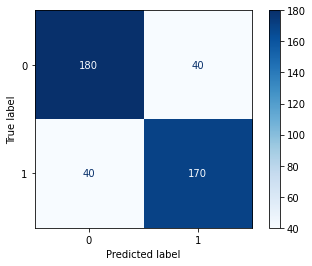

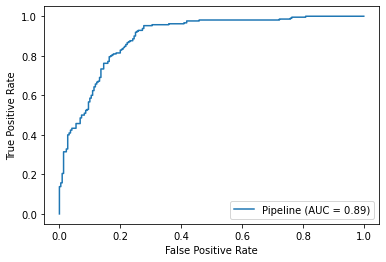

In [60]:
accuracy_and_confusionmatrix(logreg_count)

In [194]:
# interpreting the coefficients from logistic regression
logreg_count_model = logreg_count.best_estimator_

# obtain the coefficients and flatten into 1-d array
logreg_count_coef = logreg_count_model['lr'].coef_.flatten()

# obtain the words 
logreg_count_feature = logreg_count_model['cvec'].get_feature_names()

# find top 10 words with highest coefficient 
pd.DataFrame({'Features in Logistic Regression with CountVectorizer':logreg_count_feature, 
              'Top 10 Coefficient':logreg_count_coef}).sort_values(by='Top 10 Coefficient', ascending=False).head(10)

Features in Logistic Regression with CountVectorizer  Top 10 Coefficient
3080                                              snape              0.638478
2862                                                ron              0.513717
1486                                            hermion              0.493513
2706                                           question              0.431499
1573                                            hogwart              0.411732
2737                                               read              0.398284
3049                                              siriu              0.379913
1409                                         gryffindor              0.353032
3766                                                way              0.344579
3892                                              would              0.331502

**a one-unit presence in 'Snape'  implies a  0.638478  unit change in the log odds of success in classifying subreddit**
- Above are the top 10 words that have highest log odds of success in Logistic Regression with CountVectorizer in classifying the correct subreddit.
- Found that these words belong to secondary characters in Harry Potter books. Example, 'snape' from Severus Snape, 'ron' from Ron Weasley.
- Or the words are unique to the book series. Example, 'hogwarts' refers to the school in Harry Potter books and 'Griyffindor' refers the house harry potter belongs to.

In [195]:
# find top 10 words with highest coefficient 
pd.DataFrame({'Features in Logistic Regression with CountVectorizer':logreg_count_feature, 
              'Lowest 10 Coefficient':logreg_count_coef}).sort_values(by='Lowest 10 Coefficient', ascending=True).head(10)

Features in Logistic Regression with CountVectorizer  \
694                                               crime     
2278                                            niffler     
806                                                depp     
3435                                               tina     
2273                                               next     
1746                                             johnni     
3443                                               titl     
1880                                               leta     
943                                           dumbledor     
2586                                               poll     

      Lowest 10 Coefficient  
694               -0.824140  
2278              -0.558891  
806               -0.546010  
3435              -0.519890  
2273              -0.495232  
1746              -0.416667  
3443              -0.414876  
1880              -0.402625  
943               -0.382942  
2586              -0.366356

**a one-unit presence in 'crime' implies a -0.824140 unit change in the log odds of success in classifying subreddit**
 
- from the above list, we can observe the stemmed word 'dumbledor' which is referring to Albus Dumbledore, a character that appears frequently in both book series.
- Therefore, as Albus Dumbledore is present in both books, it does not help much in classifying the different subreddits

In [69]:
logreg_count.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__C': 0.1}

In [64]:
classifer_with_transformer =list()
auc_list = list()

classifer_with_transformer.append('Logistic Regression and Countvectorizer')
auc_list.append(0.89)

#### 8.2 Logistic Regression and Tfidvectorizer pipeline

In [65]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(solver='lbfgs')),
])

In [66]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'lr__C': [0.01, 0.1, 1.0],
}

logreg_tfid = GridSearchCV( pipe,
                   pipe_params,
                   cv=5) 

logreg_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.01, 0.1, 1.0], 'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [67]:
print('For Logistic Regression and Tfidvectorizer pipeline:')
print()
list_of_scores(logreg_tfid)

For Logistic Regression and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.8215787409887492
train set accuracy score  : 0.9627618308766486
test set accuracy score  : 0.8302325581395349


In [68]:
logreg_tfid.best_params_

{'lr__C': 1.0,
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

Accuracy score using y_test and predictions  : 0.8302325581395349

True Negatives  : 179
False Positives  : 41
False Negatives  : 32
True Positives  : 178

Sensitivity / True Positive Rate  : 0.8476190476190476
Fall-out / False Positive Rate  : 0.18636363636363637


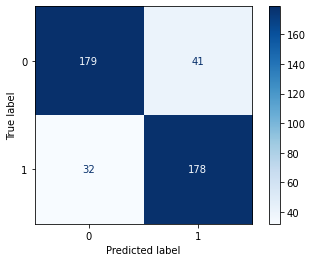

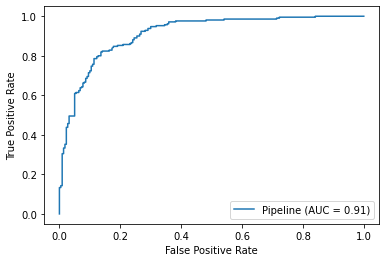

In [70]:
accuracy_and_confusionmatrix(logreg_tfid)

In [196]:
# interpreting the coefficients from logistic regression
logreg_tfid_model = logreg_tfid.best_estimator_

# obtain the coefficients and flatten into 1-d array
logreg_tfid_coef = logreg_tfid_model['lr'].coef_.flatten()

# obtain the words 
logreg_tfid_feature = logreg_tfid_model['tvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features in Logistic Regression with TfidfVectorizer':logreg_tfid_feature, 
              'Top 10 Coefficient':logreg_tfid_coef}).sort_values(by='Top 10 Coefficient', ascending=False).head(10)

Features in Logistic Regression with TfidfVectorizer  Top 10 Coefficient
3080                                              snape              2.374277
1486                                            hermion              1.803491
2862                                                ron              1.741537
3049                                              siriu              1.481361
3605                                          voldemort              1.401970
2737                                               read              1.370065
1573                                            hogwart              1.365708
3892                                              would              1.345529
1409                                         gryffindor              1.189306
2706                                           question              1.141295

**a one-unit presence in 'Snape' implies a 2.374277 unit change in the log odds of success in classifying subreddit**

Above are the top 10 words that have highest log odds of success in Logistic Regression with TfidVectorizer in classifying the correct subreddit.
Found that these words belong to secondary characters in Harry Potter books. Example, 'snape' from Severus Snape, 'ron' from Ron Weasley.
Or the words are unique to the book series. Example, 'hogwarts' refers to the school in Harry Potter books and 'Griyffindor' refers the house harry potter belongs to.

In [197]:
# find top 10 words with lowest coefficient with the tfidvectorizer
pd.DataFrame({'Features in Logistic Regression with TfidfVectorizer':logreg_tfid_feature, 
              'Lowest 10 Coefficient':logreg_tfid_coef}).sort_values(by='Lowest 10 Coefficient', ascending=True).head(10)

Features in Logistic Regression with TfidfVectorizer  \
694                                               crime     
943                                           dumbledor     
3435                                               tina     
2278                                            niffler     
806                                                depp     
1189                                               find     
1880                                               leta     
2273                                               next     
1746                                             johnni     
3443                                               titl     

      Lowest 10 Coefficient  
694               -2.410647  
943               -1.890877  
3435              -1.884726  
2278              -1.868829  
806               -1.736449  
1189              -1.534501  
1880              -1.485519  
2273              -1.454868  
1746              -1.390154  
3443              -1.384250

**a one-unit presence in 'crime' implies a -2.410647 unit change in the log odds of success in classifying subreddit**
- Note that the values are different when using TfidVectorizer instead of CountVectorizer as a preprocessor

In [74]:
classifer_with_transformer.append('Logistic Regression and Tfidvectorizer')
auc_list.append(0.91)

### 9. K-Nearest Neighbors

#### 9.1 K-Nearest Neighbors and Countvectorizer pipeline

In [75]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier()),
])

In [76]:
pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'knn__n_neighbors': [5, 7, 9],
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance'], 
}
knn_count = GridSearchCV( pipe, pipe_params, cv=5)

knn_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'knn__n_neighbors': [5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [77]:
print('For K-Nearest Neighbors and Countvectorizer pipeline:')
print()
list_of_scores(knn_count)

For K-Nearest Neighbors and Countvectorizer pipeline:

GridSearchCV accuracy score  : 0.6229511658070159
train set accuracy score  : 0.9984484096198604
test set accuracy score  : 0.6232558139534884


In [78]:
knn_count.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'distance'}

Accuracy score using y_test and predictions  : 0.6232558139534884

True Negatives  : 166
False Positives  : 54
False Negatives  : 108
True Positives  : 102

Sensitivity / True Positive Rate  : 0.4857142857142857
Fall-out / False Positive Rate  : 0.24545454545454545


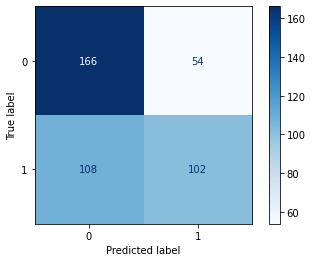

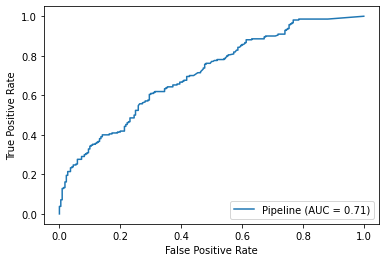

In [79]:
accuracy_and_confusionmatrix(knn_count)

In [80]:
classifer_with_transformer.append('K-Nearest Neighbors and Countvectorizer')
auc_list.append(0.71)

From the above metrics pulled, KNN classifier with Countvectorizer show overfit with high`train set accuracy score  : 0.9984` and  low `test set accuracy score  : 0.6233` , this model also have a `low sensitivity at 48.5%`

#### 9.2 K-Nearest Neighbors and Tfidvectorizer pipeline

In [81]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier()),
])

In [82]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'knn__n_neighbors': [5, 7, 9],
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance'],
}
knn_tfid = GridSearchCV(pipe, pipe_params, cv=5)

knn_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [83]:
print('For K-Nearest Neighbors and Tfidvectorizer pipeline:')
print()
list_of_scores(knn_tfid)

For K-Nearest Neighbors and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.7641601061744036
train set accuracy score  : 0.9992242048099301
test set accuracy score  : 0.786046511627907


In [84]:
knn_tfid.best_params_

{'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'distance',
 'tvec__max_df': 0.9,
 'tvec__max_features': 5000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

Accuracy score using y_test and predictions  : 0.786046511627907

True Negatives  : 198
False Positives  : 22
False Negatives  : 70
True Positives  : 140

Sensitivity / True Positive Rate  : 0.6666666666666666
Fall-out / False Positive Rate  : 0.1


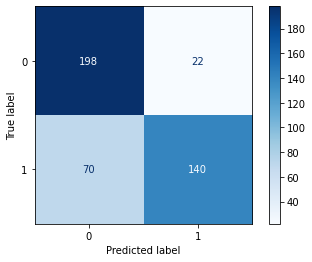

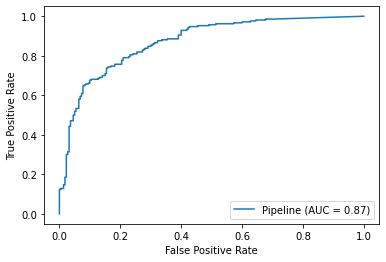

In [85]:
accuracy_and_confusionmatrix(knn_tfid)

In [86]:
classifer_with_transformer.append('K-Nearest Neighbors and Tfidvectorizer')
auc_list.append(0.87)

From the above metrics pulled, KNN classifier with Tfidvectorizer show overfit with high`train set accuracy score  : 0.9982` and  low `test set accuracy score  : 0.7860` , this model also have a `low sensitivity at 66.7%`

### 10. Multinomial Naive Bayes Classification

#### 10.1 Multinomial Naive Bayes and Countvectorizer pipeline
- is known for a decent classifier, known to be a bad estimator, so that the probability outputs from predict_proba should not be taken too seriously

In [93]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('MultiNB', MultinomialNB()),
])

In [94]:
pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'MultiNB__alpha': [0.01, 0.1, 1.0], 
}
MultiNB_count = GridSearchCV(pipe, pipe_params, cv=5)

MultiNB_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('MultiNB', MultinomialNB())]),
             param_grid={'MultiNB__alpha': [0.01, 0.1, 1.0],
                         'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [89]:
MultiNB_count.best_params_

{'MultiNB__alpha': 0.1,
 'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

For Multinomial Naive Bayes and Countvectorizer pipeline:

GridSearchCV accuracy score  : 0.8463789099025728
train set accuracy score  : 0.9169899146625291
test set accuracy score  : 0.8046511627906977

Accuracy score using y_test and predictions  : 0.8046511627906977

True Negatives  : 180
False Positives  : 40
False Negatives  : 44
True Positives  : 166

Sensitivity / True Positive Rate  : 0.7904761904761904
Fall-out / False Positive Rate  : 0.18181818181818182


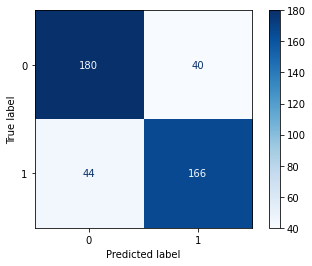

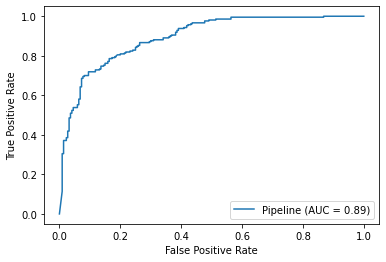

In [90]:
print('For Multinomial Naive Bayes and Countvectorizer pipeline:')
print()
list_of_scores(MultiNB_count)
print()
accuracy_and_confusionmatrix(MultiNB_count)

In [91]:
classifer_with_transformer.append('Multinomial Naive Bayes and Countvectorizer')
auc_list.append(0.89)

In [104]:
MultiNB_count_model = MultiNB_count.best_estimator_

neg_class_prob_sorted = MultiNB_count_model['MultiNB'].coef_.flatten()

# obtain the words 
MultiNB_count_feature = MultiNB_count_model['cvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features':MultiNB_count_feature, 
              'Coefficient':neg_class_prob_sorted}).sort_values(by='Coefficient', ascending=False).head(10)

Features  Coefficient
3617       wa    -4.163986
3316      thi    -4.255445
1494       hi    -4.271932
3892    would    -4.571479
1892     like    -4.690424
3383    think    -4.971990
2348      one    -5.036177
1309      get    -5.190243
3426     time    -5.245269
1799     know    -5.245269

In [252]:
MultiNB_count_model['MultiNB'].feature_log_prob_[0]

array([-9.31481025, -8.91750845, -6.59705123, ..., -8.91750845,
       -9.31481025, -8.51752281])

In [245]:

#prob for positive class
pos_class_prob_sorted = MultiNB_count_model['MultiNB'].feature_log_prob_[1, :].argsort()


#prob for negative class
neg_class_prob_sorted = MultiNB_count_model['MultiNB'].feature_log_prob_[0, :].argsort()


In [101]:
MultiNB_count_model = MultiNB_count.best_estimator_

pos_class_prob_sorted = MultiNB_count_model['MultiNB'].feature_log_prob_[1, :].argsort()


# obtain the words 
MultiNB_count_feature = MultiNB_count_model['cvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features':MultiNB_count_feature, 
              'feature ranking':(pos_class_prob_sorted)}).sort_values(by='feature ranking', ascending=True).head(10)

Features  feature ranking
2434      parent                0
648    could one                1
2722        rais                2
655   could stop                3
1738  jame siriu                4
674        crabb                5
662        count                6
663      counter                7
2724      random                8
666       courag                9

These are the top 10 features that help Multinomial Naive Bayes model classify r/harrypotter from r/FantasticBeasts

In [99]:
neg_class_prob_sorted = MultiNB_count_model['MultiNB'].feature_log_prob_[0, :]

# obtain the words 
MultiNB_count_feature = MultiNB_count_model['cvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features':MultiNB_count_feature, 
              'feature ranking':neg_class_prob_sorted}).sort_values(by='feature ranking', ascending=True).head(10)

Features  Coefficient
2113           media            0
1364            gone            1
117     also mention            2
2801           remov            3
1087          expand            4
1894  like dumbledor            5
207      around time            6
2784          regard            7
410   brother sister            8
1274           fresh            9

These are the top 10 features that do help Multinomial Naive Bayes model classify r/harrypotter from r/FantasticBeasts

#### 10.2 Multinomial Naive Bayes and Tfidvectorizer pipeline
- is known for a decent classifier, known to be a bad estimator, so that the probability outputs from predict_proba should not be taken too seriously

In [105]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('MultiNB', MultinomialNB()),
])

In [106]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'MultiNB__alpha': [0.01, 0.1, 1.0],
}

MultiNB_tfid = GridSearchCV(pipe, pipe_params, cv=5)

MultiNB_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('MultiNB', MultinomialNB())]),
             param_grid={'MultiNB__alpha': [0.01, 0.1, 1.0],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [113]:
MultiNB_tfid.best_params_

{'MultiNB__alpha': 0.1,
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

For Multinomial Naive Bayes and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.8440744427351973
train set accuracy score  : 0.9720713731574864
test set accuracy score  : 0.8255813953488372

Accuracy score using y_test and predictions  : 0.8255813953488372

True Negatives  : 186
False Positives  : 34
False Negatives  : 41
True Positives  : 169

Sensitivity / True Positive Rate  : 0.8047619047619048
Fall-out / False Positive Rate  : 0.15454545454545454


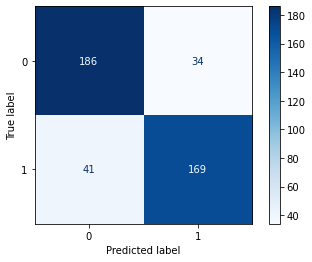

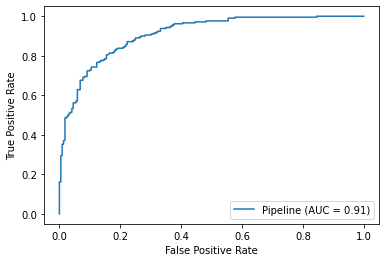

In [114]:
print('For Multinomial Naive Bayes and Tfidvectorizer pipeline:')
print()
list_of_scores(MultiNB_tfid)
print()
accuracy_and_confusionmatrix(MultiNB_tfid)

In [115]:
classifer_with_transformer.append('Multinomial Naive Bayes and Tfidvectorizer')
auc_list.append(0.91)

In [112]:
MultiNB_tfid_model = MultiNB_tfid.best_estimator_

pos_class_prob_sorted = MultiNB_tfid_model['MultiNB'].feature_log_prob_[1, :].argsort()


# obtain the words 
MultiNB_tfid_feature = MultiNB_tfid_model['tvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features':MultiNB_tfid_feature, 
              'feature ranking':(pos_class_prob_sorted)}).sort_values(by='feature ranking', ascending=True).head(10)

Features  feature ranking
1905       like one                0
610         convinc                1
2330         odditi                2
612        cool see                3
1640            ill                4
614            copi                5
615           corbi                6
616            core                7
2657          prior                8
618   corneliu fudg                9

These are the top 10 features that do help Multinomial Naive Bayes model with TfidVectorizer classify r/harrypotter from r/FantasticBeasts

In [111]:
neg_class_prob_sorted = MultiNB_tfid_model['MultiNB'].feature_log_prob_[0, :].argsort()

# obtain the words 
MultiNB_tfid_feature = MultiNB_tfid_model['tvec'].get_feature_names()

# find top 10 words with highest coefficient with the tfidvectorizer
pd.DataFrame({'Features':MultiNB_tfid_feature, 
              'feature ranking':neg_class_prob_sorted}).sort_values(by='feature ranking', ascending=True).head(10)

Features  feature ranking
1771         keeper                0
1456            hbo                1
3845   witch wizard                2
836          devast                3
3408     thought wa                4
1304          geniu                5
3756    watch crime                6
1359            gof                7
2783          refus                8
961   dumbledor use                9

These are the top 10 features that do not help Multinomial Naive Bayes model with TfidVectorizer classify r/harrypotter from r/FantasticBeasts

### 11. Bagging Classifier

#### 11.1 Bagging Classifier and Countvectorizer pipeline

In [116]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('BagClass', BaggingClassifier()),
])

In [117]:
pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'BagClass__n_estimators': [10, 20, 25, 30], 
}
Bagclass_count = GridSearchCV(pipe, pipe_params, cv=5)

Bagclass_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('BagClass', BaggingClassifier())]),
             param_grid={'BagClass__n_estimators': [10, 20, 25, 30],
                         'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [118]:
Bagclass_count.best_params_

{'BagClass__n_estimators': 30,
 'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

In [121]:
Bagclass_count.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=4000, min_df=3,
                                 ngram_range=(1, 2))),
                ('BagClass', BaggingClassifier(n_estimators=30))])

For Bagging Classifier and Countvectorizer pipeline:

GridSearchCV accuracy score  : 0.764971495792236
train set accuracy score  : 0.9945694336695112
test set accuracy score  : 0.7232558139534884

Accuracy score using y_test and predictions  : 0.7232558139534884

True Negatives  : 165
False Positives  : 55
False Negatives  : 64
True Positives  : 146

Sensitivity / True Positive Rate  : 0.6952380952380952
Fall-out / False Positive Rate  : 0.25


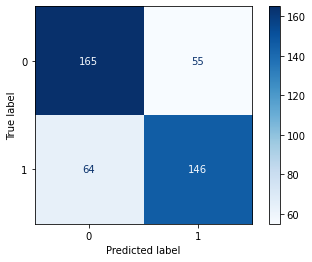

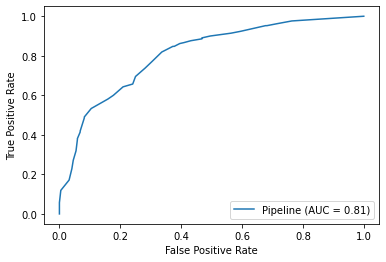

In [119]:
print('For Bagging Classifier and Countvectorizer pipeline:')
print()
list_of_scores(Bagclass_count)
print()
accuracy_and_confusionmatrix(Bagclass_count)

In [120]:
classifer_with_transformer.append('Bagging Classifier and Countvectorizer')
auc_list.append(0.81)

In [199]:
Bagclass_count_model = Bagclass_count.best_estimator_

feature_importances = np.mean([tree.feature_importances_ for tree in Bagclass_count_model['BagClass'].estimators_], axis=0)

Bagclass_count_feature = Bagclass_count_model['cvec'].get_feature_names()

pd.DataFrame({'Features in Bagging Classifier with Countvectorizer':Bagclass_count_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

Features in Bagging Classifier with Countvectorizer  \
693                                               crime    
2768                                                ron    
785                                                depp    
2980                                              snape    
3378                                               tina    
1593                                            hogwart    
3904                                              would    
900                                           dumbledor    
1916                                               leta    
2648                                               read    

      Top 10 Feature Importance Scores  
693                           0.048516  
2768                          0.030428  
785                           0.028650  
2980                          0.024426  
3378                          0.022706  
1593                          0.019498  
3904                          0.014892  
900                           0.013412  
1916                          0.012512  
2648                          0.011433

These are the top 10 features that do help Bagging Classifier model with CountVectorizer classify r/harrypotter from r/FantasticBeasts

#### 11.2 Bagging Classifier and Tfidvectorizer pipeline

In [136]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('BagClass', BaggingClassifier()),
])

In [137]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'BagClass__n_estimators': [10, 20, 25],
}

BagClass_tfid = GridSearchCV(pipe, pipe_params, cv=5)

BagClass_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('BagClass', BaggingClassifier())]),
             param_grid={'BagClass__n_estimators': [10, 20, 25],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [143]:
BagClass_tfid.best_params_

{'BagClass__n_estimators': 20,
 'tvec__max_df': 0.95,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [144]:
BagClass_tfid.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.95, max_features=2000, min_df=2,
                                 ngram_range=(1, 2))),
                ('BagClass', BaggingClassifier(n_estimators=20))])

For Bagging Classifier and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.7618375410973366
train set accuracy score  : 0.9945694336695112
test set accuracy score  : 0.7581395348837209

Accuracy score using y_test and predictions  : 0.7581395348837209

True Negatives  : 167
False Positives  : 53
False Negatives  : 51
True Positives  : 159

Sensitivity / True Positive Rate  : 0.7571428571428571
Fall-out / False Positive Rate  : 0.2409090909090909


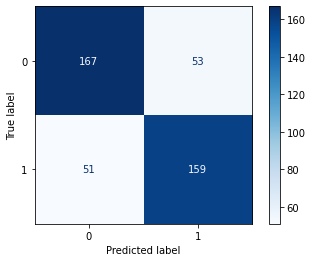

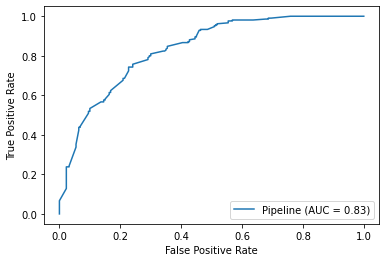

In [139]:
print('For Bagging Classifier and Tfidvectorizer pipeline:')
print()
list_of_scores(BagClass_tfid)
print()
accuracy_and_confusionmatrix(BagClass_tfid)

In [140]:
classifer_with_transformer.append('Bagging Classifier and Tfidvectorizer')
auc_list.append(0.83)

In [201]:
Bagclass_tfid_model = BagClass_tfid.best_estimator_

feature_importances = np.mean([tree.feature_importances_ for tree in Bagclass_tfid_model['BagClass'].estimators_], axis=0)

Bagclass_tfid_feature = Bagclass_tfid_model['tvec'].get_feature_names()

pd.DataFrame({'Features in Bagging Classifier with Tfidvectorizer':Bagclass_tfid_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

Features in Bagging Classifier with Tfidvectorizer  \
361                                               crime   
1552                                              snape   
1434                                                ron   
410                                                depp   
1752                                               tina   
1962                                              would   
815                                             hogwart   
461                                           dumbledor   
1360                                               read   
771                                             hermion   

      Top 10 Feature Importance Scores  
361                           0.047539  
1552                          0.027585  
1434                          0.024593  
410                           0.024138  
1752                          0.023682  
1962                          0.020743  
815                           0.019585  
461                           0.015329  
1360                          0.013671  
771                           0.012770

These are the top 10 features that do help Bagging Classifier model with TfidVectorizer classify r/harrypotter from r/FantasticBeasts

### 12. Random Forest Classifier

#### 12.1 Random Forest Classifier and Countvectorizer pipeline

In [147]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier()),
])

In [149]:
pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'rf__max_depth' :[2, 3, 5],
    'rf__n_estimators':[100, 150, 200]    
}

rf_count = GridSearchCV(pipe, pipe_params, cv=5)

rf_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [2, 3, 5],
                         'rf__n_estimators': [100, 150, 200]})

In [150]:
rf_count.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'rf__max_depth': 5,
 'rf__n_estimators': 200}

For Random Forest Classifier and Countvectorizer pipeline:

GridSearchCV accuracy score  : 0.794437909088167
train set accuracy score  : 0.8471683475562451
test set accuracy score  : 0.7906976744186046

Accuracy score using y_test and predictions  : 0.7906976744186046

True Negatives  : 154
False Positives  : 66
False Negatives  : 24
True Positives  : 186

Sensitivity / True Positive Rate  : 0.8857142857142857
Fall-out / False Positive Rate  : 0.3


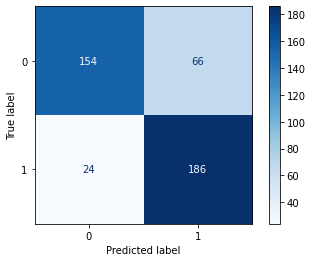

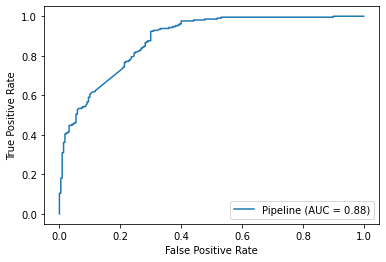

In [151]:
print('For Random Forest Classifier and Countvectorizer pipeline:')
print()
list_of_scores(rf_count)
print()
accuracy_and_confusionmatrix(rf_count)

In [152]:
classifer_with_transformer.append('Random Forest Classifier and Countvectorizer')
auc_list.append(0.88)

In [206]:
rf_count_model = rf_count.best_estimator_

feature_importances = np.mean([tree.feature_importances_ for tree in rf_count_model['rf'].estimators_], axis=0)

rf_count_feature = rf_count_model['cvec'].get_feature_names()

rf_top_feature = pd.DataFrame({'Features in Random Forest Classifier with Countvectorizer':rf_count_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

rf_top_feature

Features in Random Forest Classifier with Countvectorizer  \
759                                               crime          
876                                                depp          
4046                                               tina          
247                                             aureliu          
3555                                              snape          
2197                                               leta          
1729                                            hermion          
2668                                            obscuru          
3513                                              siriu          
614                                                 cog          

      Top 10 Feature Importance Scores  
759                           0.029958  
876                           0.027652  
4046                          0.024444  
247                           0.018328  
3555                          0.017982  
2197                          0.017502  
1729                          0.017120  
2668                          0.016975  
3513                          0.015474  
614                           0.015167

These are the top 10 features that do help Random Forest Classifier model with CountVectorizer classify r/harrypotter from r/FantasticBeasts

#### 12.2 Random Forest Classifier and Tfidvectorizer pipeline

In [156]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier()),
])

In [157]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'rf__max_depth' :[2, 3, 5],
    'rf__n_estimators':[100, 150, 200]   
}

rf_tfid = GridSearchCV(pipe, pipe_params, cv=5)

rf_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [2, 3, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

For Random Forest Classifier and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.8068470424999246
train set accuracy score  : 0.8688906128782001
test set accuracy score  : 0.7953488372093023

Accuracy score using y_test and predictions  : 0.7953488372093023

True Negatives  : 162
False Positives  : 58
False Negatives  : 30
True Positives  : 180

Sensitivity / True Positive Rate  : 0.8571428571428571
Fall-out / False Positive Rate  : 0.2636363636363636


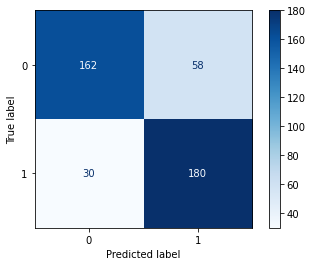

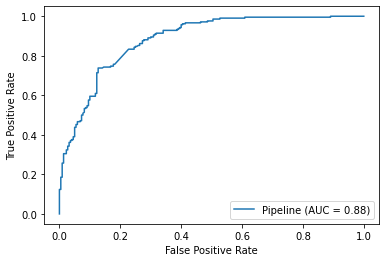

In [158]:
print('For Random Forest Classifier and Tfidvectorizer pipeline:')
print()
list_of_scores(rf_tfid)
print()
accuracy_and_confusionmatrix(rf_tfid)

In [159]:
classifer_with_transformer.append('Random Forest Classifier and Tfidvectorizer')
auc_list.append(0.88)

In [203]:
# finding the most important features for random forest & tfidvectorizer

#fit best estimators to model
rf_tfid_model = rf_tfid.best_estimator_

#
feature_importances = np.mean([tree.feature_importances_ for tree in rf_tfid_model['rf'].estimators_], axis=0)

rf_tfid_feature = rf_tfid_model['tvec'].get_feature_names()

pd.DataFrame({'Features in Random Forest Classifier with Tfidvectorizer':rf_tfid_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

Features in Random Forest Classifier with Tfidvectorizer  \
1573                                              snape         
361                                               crime         
1756                                               tina         
417                                                depp         
991                                                leta         
1170                                               next         
1190                                            obscuru         
918                                              johnni         
1358                                             queeni         
473                                           dumbledor         

      Top 10 Feature Importance Scores  
1573                          0.035139  
361                           0.033020  
1756                          0.025428  
417                           0.023581  
991                           0.023039  
1170                          0.020582  
1190                          0.020502  
918                           0.019448  
1358                          0.018986  
473                           0.018582

These are the top 10 features that do help Random Forest Classifier model with TfidVectorizer classify r/harrypotter from r/FantasticBeasts

### 13 Extra Trees Classifier

#### 13.1 Extra Trees Classifier and Countvectorizer pipeline

In [162]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('etc', ExtraTreesClassifier()),
])

In [163]:
pipe_params ={
    'cvec__max_features':[2000, 3000, 4000, 5000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[0.9, 0.95],
    'cvec__ngram_range':[(1,1), (1,2)],
    'etc__max_depth' :[2, 3, 5],
    'etc__n_estimators':[100, 150, 200]   
}

etc_count = GridSearchCV(pipe, pipe_params, cv=5)

etc_count.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('etc', ExtraTreesClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'etc__max_depth': [2, 3, 5],
                         'etc__n_estimators': [100, 150, 200]})

In [164]:
etc_count.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'etc__max_depth': 5,
 'etc__n_estimators': 200}

For Extra Trees Classifier and Countvectorizer pipeline:

GridSearchCV accuracy score  : 0.7812324676499864
train set accuracy score  : 0.8657874321179209
test set accuracy score  : 0.7674418604651163

Accuracy score using y_test and predictions  : 0.7674418604651163

True Negatives  : 165
False Positives  : 55
False Negatives  : 45
True Positives  : 165

Sensitivity / True Positive Rate  : 0.7857142857142857
Fall-out / False Positive Rate  : 0.25


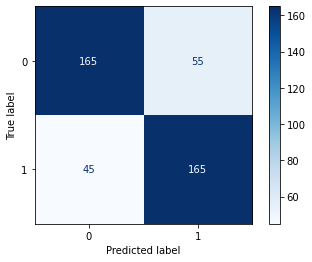

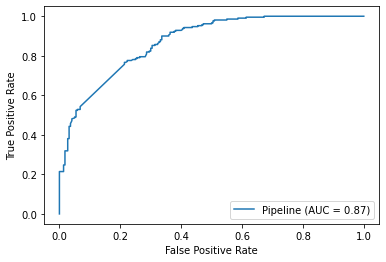

In [165]:
print('For Extra Trees Classifier and Countvectorizer pipeline:')
print()
list_of_scores(etc_count)
print()
accuracy_and_confusionmatrix(etc_count)

In [166]:
classifer_with_transformer.append('Extra Trees Classifier and Countvectorizer')
auc_list.append(0.87)

In [204]:
etc_count_model = etc_count.best_estimator_

feature_importances = np.mean([tree.feature_importances_ for tree in etc_count_model['etc'].estimators_], axis=0)

etc_count_feature = etc_count_model['cvec'].get_feature_names()

pd.DataFrame({'Features in Extra Trees Classifier with Countvectorizer':etc_count_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

Features in Extra Trees Classifier with Countvectorizer  \
1299                                               poll        
924                                            jude law        
681                                             gellert        
919                                         johnni depp        
361                                               crime        
918                                              johnni        
1486                                            scamand        
1456                                                ron        
1848                                          view poll        
1172                                            niffler        

      Top 10 Feature Importance Scores  
1299                          0.028197  
924                           0.020469  
681                           0.018589  
919                           0.017863  
361                           0.017257  
918                           0.013550  
1486                          0.012111  
1456                          0.011762  
1848                          0.010984  
1172                          0.010426

These are the top 10 features that do help Extra Trees Classifier model with CountVectorizer classify r/harrypotter from r/FantasticBeasts

#### 13.2 Extra Trees Classifier and Tfidvectorizer pipeline

In [169]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('etc', ExtraTreesClassifier()),
])

In [170]:
pipe_params ={
    'tvec__max_features':[2000, 3000, 4000, 5000],
    'tvec__min_df':[2,3],
    'tvec__max_df':[0.9, 0.95],
    'tvec__ngram_range':[(1,1), (1,2)],
    'etc__max_depth' :[2, 3, 5],
    'etc__n_estimators':[100, 150, 200]   
}

etc_tfid = GridSearchCV(pipe, pipe_params, cv=5)

etc_tfid.fit(X_train_clean, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('etc', ExtraTreesClassifier())]),
             param_grid={'etc__max_depth': [2, 3, 5],
                         'etc__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [171]:
etc_tfid.best_params_

{'etc__max_depth': 5,
 'etc__n_estimators': 200,
 'tvec__max_df': 0.95,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

For Extra Trees Classifier and Tfidvectorizer pipeline:

GridSearchCV accuracy score  : 0.7649533978825446
train set accuracy score  : 0.8533747090768037
test set accuracy score  : 0.7627906976744186

Accuracy score using y_test and predictions  : 0.7627906976744186

True Negatives  : 199
False Positives  : 21
False Negatives  : 81
True Positives  : 129

Sensitivity / True Positive Rate  : 0.6142857142857143
Fall-out / False Positive Rate  : 0.09545454545454546


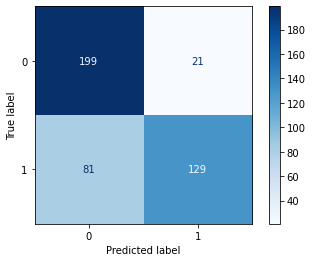

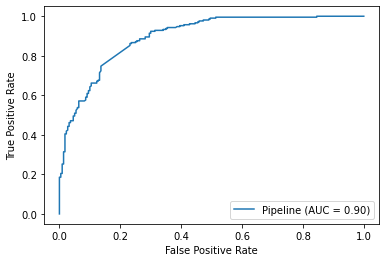

In [172]:
print('For Extra Trees Classifier and Tfidvectorizer pipeline:')
print()
list_of_scores(etc_tfid)
print()
accuracy_and_confusionmatrix(etc_tfid)

In [173]:
classifer_with_transformer.append('Extra Trees Classifier and Tfidvectorizer')
auc_list.append(0.90)

In [205]:
etc_tfid_model = etc_tfid.best_estimator_

feature_importances = np.mean([tree.feature_importances_ for tree in etc_tfid_model['etc'].estimators_], axis=0)

etc_tfid_feature = etc_tfid_model['tvec'].get_feature_names()

pd.DataFrame({'Features in Extra Trees Classifier with Tfidvectorizer':etc_tfid_feature, 
              'Top 10 Feature Importance Scores':(feature_importances)}).sort_values(by='Top 10 Feature Importance Scores', ascending=False).head(10)

Features in Extra Trees Classifier with Tfidvectorizer  \
1573                                              snape       
1756                                               tina       
776                                             hermion       
361                                               crime       
417                                                depp       
919                                         johnni depp       
1456                                                ron       
1048                                      mad mikkelsen       
923                                                jude       
1299                                               poll       

      Top 10 Feature Importance Scores  
1573                          0.022193  
1756                          0.020814  
776                           0.019758  
361                           0.018863  
417                           0.018749  
919                           0.017283  
1456                          0.016853  
1048                          0.015378  
923                           0.013870  
1299                          0.013687

These are the top 10 features that do help Extra Trees Classifier model with TfidVectorizer classify r/harrypotter from r/FantasticBeasts

### 14. Scoreboard of different classification models

In [177]:
# tabulating all the metrics
score_board = pd.DataFrame({'Classification Algorithm and Transformer': classifer_with_transformer,
             'GridSearchCV Accuracy Score': GridSearch_CV_accuracy_score,
             'Accuracy Score on Train set': model_training_accuracy_score,
             'Accuracy Score on Test set': model_testing_accuracy_score,
              'Sensitivity':sensitivity,
              'Fall Out rate': fall_out,
             'ROC AUC Score': auc_list},)

# save as csv 
score_board.to_csv('project3_scoreboard.csv', index=False)

In [178]:
# checking that score_board is saved

pd.read_csv('project3_scoreboard.csv')

Classification Algorithm and Transformer  GridSearchCV Accuracy Score  \
0        Logistic Regression and Countvectorizer                     0.797527   
1         Logistic Regression and Tfidvectorizer                     0.821579   
2        K-Nearest Neighbors and Countvectorizer                     0.622951   
3         K-Nearest Neighbors and Tfidvectorizer                     0.764160   
4    Multinomial Naive Bayes and Countvectorizer                     0.846379   
5     Multinomial Naive Bayes and Tfidvectorizer                     0.844074   
6         Bagging Classifier and Countvectorizer                     0.764971   
7          Bagging Classifier and Tfidvectorizer                     0.761838   
8   Random Forest Classifier and Countvectorizer                     0.794438   
9    Random Forest Classifier and Tfidvectorizer                     0.806847   
10    Extra Trees Classifier and Countvectorizer                     0.781232   
11     Extra Trees Classifier and Tfidvectorizer                     0.764953   

    Accuracy Score on Train set  Accuracy Score on Test set  Sensitivity  \
0                      0.953452                    0.813953     0.809524   
1                      0.962762                    0.830233     0.847619   
2                      0.998448                    0.623256     0.485714   
3                      0.999224                    0.786047     0.666667   
4                      0.916990                    0.804651     0.790476   
5                      0.972071                    0.825581     0.804762   
6                      0.994569                    0.723256     0.695238   
7                      0.994569                    0.758140     0.757143   
8                      0.847168                    0.790698     0.885714   
9                      0.868891                    0.795349     0.857143   
10                     0.865787                    0.767442     0.785714   
11                     0.853375                    0.762791     0.614286   

    Fall Out rate  ROC AUC Score  
0        0.181818           0.89  
1        0.186364           0.91  
2        0.245455           0.71  
3        0.100000           0.87  
4        0.181818           0.89  
5        0.154545           0.91  
6        0.250000           0.81  
7        0.240909           0.83  
8        0.300000           0.88  
9        0.263636           0.88  
10       0.250000           0.87  
11       0.095455           0.90

In [179]:
# delta refers to the difference in accuracy score between the train and test set
# smaller the difference shows how the test set can generalise to unseen data

score_board['delta']=score_board['Accuracy Score on Train set'] - score_board['Accuracy Score on Test set']

In [190]:
table = score_board.sort_values(by='Sensitivity', ascending=False).drop(['GridSearchCV Accuracy Score','Fall Out rate','ROC AUC Score'], axis=1)

table

Classification Algorithm and Transformer  Accuracy Score on Train set  \
8   Random Forest Classifier and Countvectorizer                     0.847168   
9    Random Forest Classifier and Tfidvectorizer                     0.868891   
1         Logistic Regression and Tfidvectorizer                     0.962762   
0        Logistic Regression and Countvectorizer                     0.953452   
5     Multinomial Naive Bayes and Tfidvectorizer                     0.972071   
4    Multinomial Naive Bayes and Countvectorizer                     0.916990   
10    Extra Trees Classifier and Countvectorizer                     0.865787   
7          Bagging Classifier and Tfidvectorizer                     0.994569   
6         Bagging Classifier and Countvectorizer                     0.994569   
3         K-Nearest Neighbors and Tfidvectorizer                     0.999224   
11     Extra Trees Classifier and Tfidvectorizer                     0.853375   
2        K-Nearest Neighbors and Countvectorizer                     0.998448   

    Accuracy Score on Test set  Sensitivity     delta  
8                     0.790698     0.885714  0.056471  
9                     0.795349     0.857143  0.073542  
1                     0.830233     0.847619  0.132529  
0                     0.813953     0.809524  0.139499  
5                     0.825581     0.804762  0.146490  
4                     0.804651     0.790476  0.112339  
10                    0.767442     0.785714  0.098346  
7                     0.758140     0.757143  0.236430  
6                     0.723256     0.695238  0.271314  
3                     0.786047     0.666667  0.213178  
11                    0.762791     0.614286  0.090584  
2                     0.623256     0.485714  0.375193

Above is the scoreboard for classification models with the different text preprocessor
Columns in the score board are:
   - Accuracy Score on Train set
   - Accuracy Score on Test set
   - Sensitivity score
   - delta (which is the difference between accuracy score in the Train and Test set)

### 15. Conclusion 

#### A. Based on models
*1. Best Model - Random Forest Classifier with CountVectorizer(preprocessing)*
- Based on sensitivity, which is True Positive/(True Positive + False Negative), *Random Forest Classifier with CountVectorizer(preprocessing)* has the highest sensitivity in classifying the harrypotter subreddit from FantasticBeasts.
- In addtion, this model has the lowest difference in accuracy score('delta' column) between train data and test data which is the unseen data, this means the model can generalise to unseen data compared to other models.
- Random Forest Classifier splits on the largest drop in gini impurity for classification

*2. Overfitting - K-Nearest Neighbors & Bagging Classifier*
- These models have the largest difference in accuracy score('delta' column) between train data and test data.
- The accuracy score on train set are 0.99 which shows signs of overfitting. So even though accuracy score is high on train set, these models did not perform well on test set/unseen data.
- They have low bias and high variance based on the scores

*3. Logistic Regression & Multinomial Naive Bayes*
- These models also show high sensitivity but did not perform as well as Random Forest Classifier with CountVectorizer(preprocessing)

*4. Extra Trees Classifier*
- This model showed better performance with preprocessor Countvectorizer than with Tfidvectorizer. But this might be because it builds multiple trees and splits nodes using random subsets of features and nodes are split on random splits, not best splits on based on the largest drop in gini impurity.

#### B. Based on preprocessor
- In comparing CountVectorizer and TfidVectorizer, both convert text data into vectors.From the above scores, it does not show if CountVectorizer or TfidVectorizer is better or significant in impacting the specificity, accuracy score as compared to the Classification ML Algorithms.

In [207]:
rf_top_feature

Features in Random Forest Classifier with Countvectorizer  \
759                                               crime          
876                                                depp          
4046                                               tina          
247                                             aureliu          
3555                                              snape          
2197                                               leta          
1729                                            hermion          
2668                                            obscuru          
3513                                              siriu          
614                                                 cog          

      Top 10 Feature Importance Scores  
759                           0.029958  
876                           0.027652  
4046                          0.024444  
247                           0.018328  
3555                          0.017982  
2197                          0.017502  
1729                          0.017120  
2668                          0.016975  
3513                          0.015474  
614                           0.015167

Above are the top 10 features that help to differentiate and classify the harry potter subreddit from Fantastic Beasts:
- these words are mostly consistent with the top 10 features of other models
- the words are stemmed versions of secondary characters from the Harry potter series
- For example 'Snape' referring to Severus Snape, 'hermion' referring to Hermione Granger from Harry Potter book series. While 'obscuru' refer to a Obscurus a black magic ability introduced in Fantastic Beasts.

In [40]:
# prediction from randomforest with count vectorizer
rf_count_model = rf_count.best_estimator_
random_forest_prediction = rf_count_model.predict(X_test_clean)

# zip the array and lists 
# compare the predictions vs y_test
checking_prediction = pd.DataFrame(zip(random_forest_prediction, y_test, X_test_clean), columns=['prediction', 'y_test', 'X_test_clean'])

# checking wrong predictions, false positives and false negatives
wrong_predictions = checking_prediction[checking_prediction['prediction'] != checking_prediction['y_test']]
wrong_predictions
# subreddit posts that are misclassified

prediction  y_test                                       X_test_clean
1             1       0                                  kappa japan demon
5             0       1         doe blu ray version includ delet scene dvd
9             1       0   made draw prison nurmengard sorri potato qualiti
10            1       0                                        realli like
16            1       0                                   follow yesterday
..          ...     ...                                                ...
406           1       0  could advanc civil like isu origin magic peopl...
408           1       0  lot peopl seem upset mcgonagal appear becaus t...
413           1       0                        like hitler recogn thi font
421           1       0  die littl line discuss think line mean interpr...
429           0       1  quot dumbledor explain bodi float sea cavern l...

[89 rows x 3 columns]

In [64]:
# find out the frequency of words like 

dictionary_of_words = dict()

for sentence in wrong_predictions['X_test_clean']:
    for word in sentence.split():
        if word not in dictionary_of_words:
            dictionary_of_words[word] = 1
        else:
            dictionary_of_words[word] += 1

pd.DataFrame(dictionary_of_words.items(), columns=['word in misclassified posts', 'count']).sort_values(by='count',ascending=False).head(10)

word in misclassified posts  count
166                          wa     40
200                         thi     26
37                       wizard     21
19                         like     20
122                       think     19
40                        magic     19
76                          one     19
160                        time     18
60                           hi     18
29                           ha     18

When checking the frequency of words in misclassified words, common words like 'wizard' and 'magic' appear.

### 16. Recommendations & Further Improvements

To further improve accuracy of **Random Forest Classifier with CountVectorizer(preprocessing) model**:
- increase the stop words
- optimize by tuning the model futher with different hyperparameters
- find out words that contribute to misclassified predictions, the False Positives and False Negatives

The fandom in r/FantasticBeasts are distinct from r/harrypotter and there are opportunities to market specific merchandise to FantasticBeasts fandom and grow revenue.

